# **Students Dropout Prediction**

#### **Explainable Artificial Intelligence**
**Advanced Topics in Machine Learning** - *Master Degree in Artificial Intelligence*

Project developed by:
- Guilherme Oliveira 
- Ricardo Costa
- Sara Táboas 

Code available in GitHub repository https://github.com/sarataboas/students-dropout-XAI/tree/branch-gui

### **Table of Contents**
1. [Project Overview](#project-overview)
2. [Pre-modeling Explanations](#pre-modeling-explanations)

    - [Exploratory Data Analysis](#eda)
        - [Dataset Overview and Quality Assessment](#dataset-overview)
        - [Feature Assessment and Visualization](#feature-assessment-and-visualization)
    
    - [Data Summarization and Reduction](#data-summarization-and-reduction)


3. [In-modeling Explanations](#in-modeling-explanations)

    - [Decision Tree Classifier](#decision-tree-classifier)
    - [Explainable Boosting Machine](#explainable-boosting-machine)
    
4. [Post-modeling Explanations](#post-modeling-explanations)

    - [Black Box Model Training](#black-box-training)
    - [Post-Hoc-XAI-Techniques](#Post-Hoc-XAI-Techniques)
        - [Simplification-Based-Techniques](#simplification-based-techniques)
        - [Feature-Based-Techniques](#feature-based-techniques)
            - [Global-Feature-importance](#global-feature-importance)
            - [ALE-plots](#ale-plots)
            - [Shapley-additive-explanations](#shapley-additive-explanations)
        - [Example-based-Techniques](#example-based-techniques)
            - [Anchors](#anchors)
            - [Counterfactual-Explanations](#counterfactual-explanations)

5. [Quality of Explanations](#quality-of-explanations)
6. [Saving At-Risk Students: XAI in Action](#xai-in-action)
7. [Policy Implications and Operationalization](#policy-implications-and-operationalization)

1000. [References](#references)

In [68]:
import sys
import os


sys.path.append(os.path.abspath("src"))

<a id="project-overview"></a>
### **Project Overview**


This project aims to address the critical issue of academic dropout in higher education by leveraging machine learning to predict student outcomes.</span> Beyond achieving high predictive accuracy, the primary objective of this work is Explainability (XAI). We seek to bridge the gap between complex algorithmic decisions and human-understandable insights, enabling academic advisors to move from passive prediction to active intervention.

We considered for this project the Students’ Dropout and Academic Success Dataset from the UCI Machine Learning Repository. This dataset includes demographic, socio-economic, and academic data from students enrolled in higher education institutions.

The project workflow is structured into three key phases:

- **Pre-modeling & EDA**: We analyze the data distribution to understand the underlying factors affecting student success before any training begins.

- **modeling & Explanation**: We adopt a dual approach, comparing:

    - "Glass Box" Models (DT): inherently interpretable models that offer transparent decision rules.

    - "Black Box" Models (e.g., XGBoost): Optimized for maximum performance, explained post-hoc using methods (like SHAP and Local Surrogate Trees...).



- **Application (Early Warning System)**: In the final stage, we deploy our best-performing model to analyze currently 'Enrolled' students. We simulate intervention scenarios (e.g., financial or academic support) to identify "savable" at-risk students, providing a practical tool for institutional decision-making.


<a id="pre-modeling-explanations"></a>
### **Pre-modeling Explanations**


In [ ]:
from utils.pre_modeling_utils import *

<a id="eda"></a>
#### **Exploratory Data Analysis**




- **Dataset Overview and Quality Assessment**: 
    - *What are we working with?* Characterization of data, relatively to the number of observations, number and types of features, overall missing rate and percentage of duplicate observations.

    - *What type of errors are we working with?* Deeply understand and mitigate any existing errors to improve the future Machine Learning approach.

- **Feature Assessment and Visualization**: 
    - *How to understand the features and its relations?* Understanding of the dataset features' individual properties - *Univariate Analysis* - as well as their interactions and relationships - *Multivariate Analysis*


<a id="dataset-overview"></a>
1. ***Dataset Overview and Quality Assessment*** 

In [70]:
df = pd.read_csv('data.csv', sep=';')  # Load your dataset here
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [71]:
# Dataset overview
print("Number of observations:", df.shape[0])
print("Number of features:", df.shape[1])

# Data Quality: missing/duplicated data
print("Number of duplicate rows:", df.duplicated().sum())
info = pd.DataFrame({
    "Column": df.columns,
    "Missing Count": df.isnull().sum().values,
    "Dtype": df.dtypes.astype(str).values
})
info

Number of observations: 4424
Number of features: 37
Number of duplicate rows: 0


Column  Missing Count    Dtype
0                                   Marital status              0    int64
1                                 Application mode              0    int64
2                                Application order              0    int64
3                                           Course              0    int64
4                     Daytime/evening attendance\t              0    int64
5                           Previous qualification              0    int64
6                   Previous qualification (grade)              0  float64
7                                      Nacionality              0    int64
8                           Mother's qualification              0    int64
9                           Father's qualification              0    int64
10                             Mother's occupation              0    int64
11                             Father's occupation              0    int64
12                                 Admission grade              0  float64
13                                       Displaced              0    int64
14                       Educational special needs              0    int64
15                                          Debtor              0    int64
16                         Tuition fees up to date              0    int64
17                                          Gender              0    int64
18                              Scholarship holder              0    int64
19                               Age at enrollment              0    int64
20                                   International              0    int64
21             Curricular units 1st sem (credited)              0    int64
22             Curricular units 1st sem (enrolled)              0    int64
23          Curricular units 1st sem (evaluations)              0    int64
24             Curricular units 1st sem (approved)              0    int64
25                Curricular units 1st sem (grade)              0  float64
26  Curricular units 1st sem (without evaluations)              0    int64
27             Curricular units 2nd sem (credited)              0    int64
28             Curricular units 2nd sem (enrolled)              0    int64
29          Curricular units 2nd sem (evaluations)              0    int64
30             Curricular units 2nd sem (approved)              0    int64
31                Curricular units 2nd sem (grade)              0  float64
32  Curricular units 2nd sem (without evaluations)              0    int64
33                               Unemployment rate              0  float64
34                                  Inflation rate              0  float64
35                                             GDP              0  float64
36                                          Target              0   object

Target variable distribution:
 Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


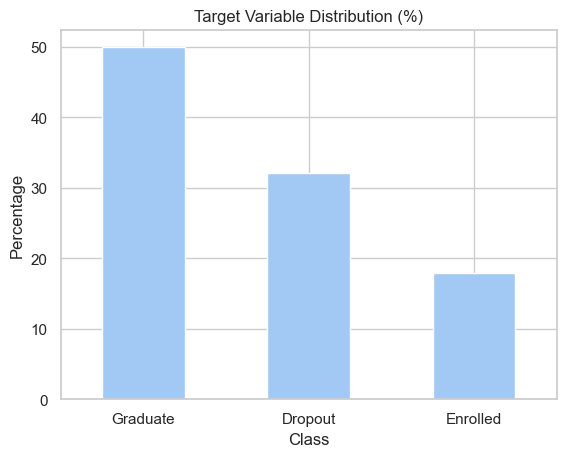

In [72]:
# Imbalance in target variable
target_counts = df['Target'].value_counts()
print("Target variable distribution:\n", target_counts)
plot_target_distribution(df)

As the goal of our project is to predict and to explain Student's Dropout, we decided to continue without observations classified as 'Enrolled'.

In [73]:
# Drop observations classified as 'Enrolled'
df = df[df['Target'] != 'Enrolled']
df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [74]:
print("Number of observations after dropping 'Enrolled':", df.shape[0])

Number of observations after dropping 'Enrolled': 3630


2. ***Feature Assessment and Visualization***

The dataset was collected to enable early identification of at-risk students, including information available at enrollment (e.g. academic background, demographics, socio-economic status) and academic performance after the 1st and 2nd semesters.

These features can be grouped into several categories:

- Demographic data;

- Socio-economic data;

- Macro-economic data;

- Academic data at enrollment;

- Academic data at the end of 1st semester;

- Academic data at the end of 2nd semester;

- Target;

These groups of features will later be used to help their analysis.
    

**Univariate Analysis**

Analysis the individual characteristics of each feature, to further help on decisions such as their relevance for the analysis itself and the type of data preparation required to achieve our project goals. 

- **Numerical Features:** most often comprise information regarding mean, standard deviation, skewness, and other quantile statistics, and are best represented using histogram plots

- **Categorical Features:** usually described using the mode and frequency tables, and represented using bar plots for category analysis.

**A) Demographic Data:**
- Marital Status
- Nationality
- Displaced
- Gender
- Age at enrollment
- International 

As mentioned before, we will treat Marital status, Nacionality, Displaced, Gender and International as categorical features. The remaining one, Age at enrollment will be treated as its data type (numerical)

In [8]:
demographic_features = ['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment', 'International']

numerical_demographic = ["Age at enrollment"]
categorical_demographic = ["Marital status", "Nacionality", "Gender", "Displaced", "International"]

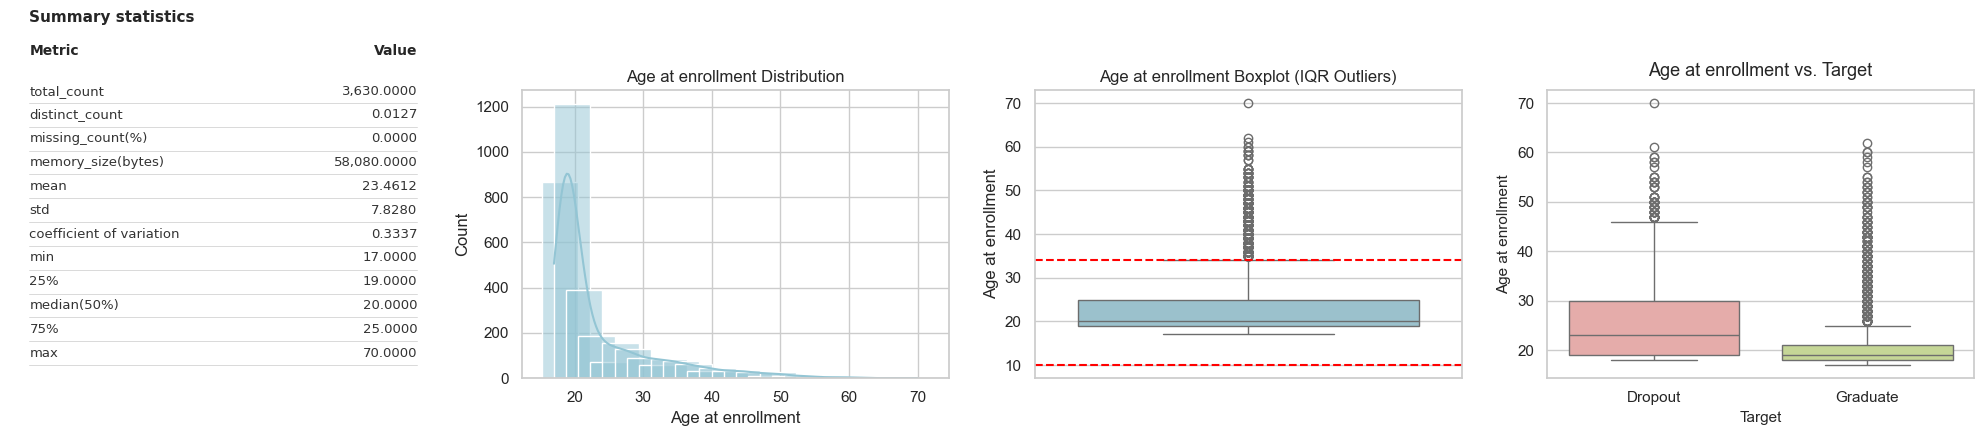

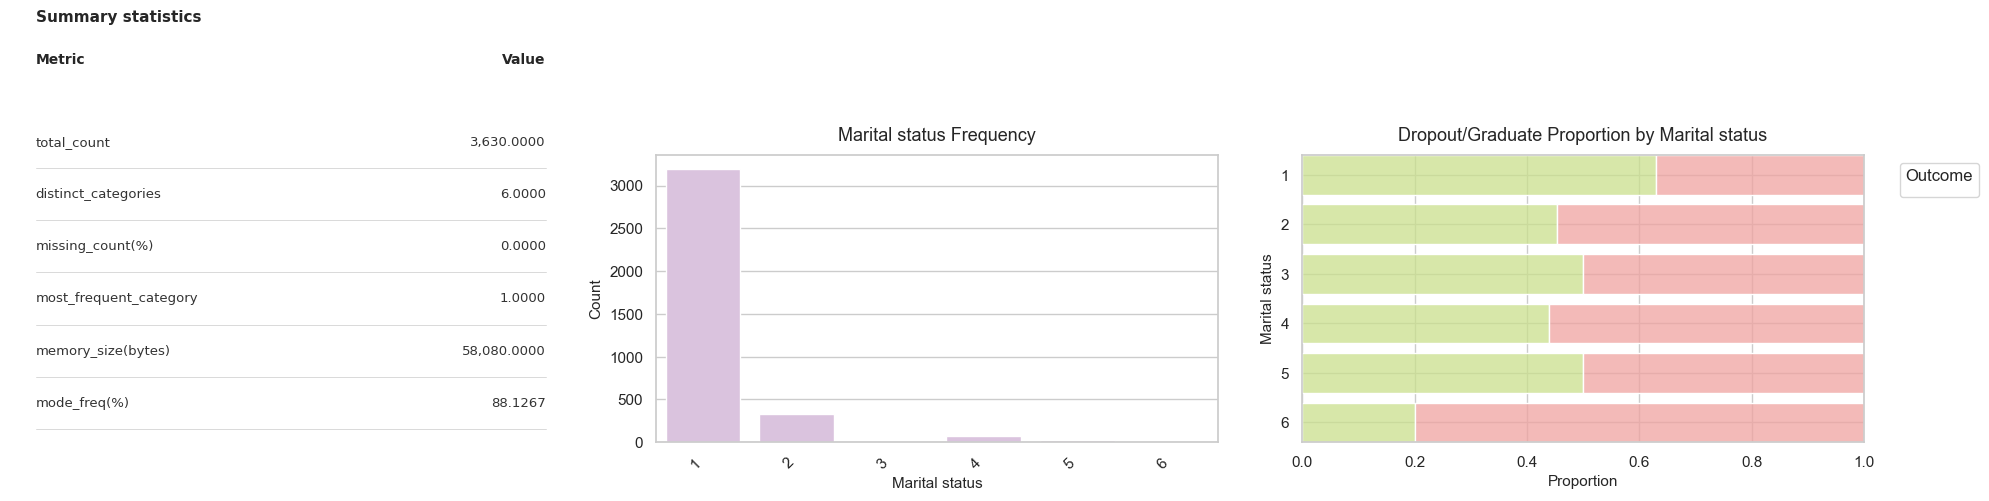

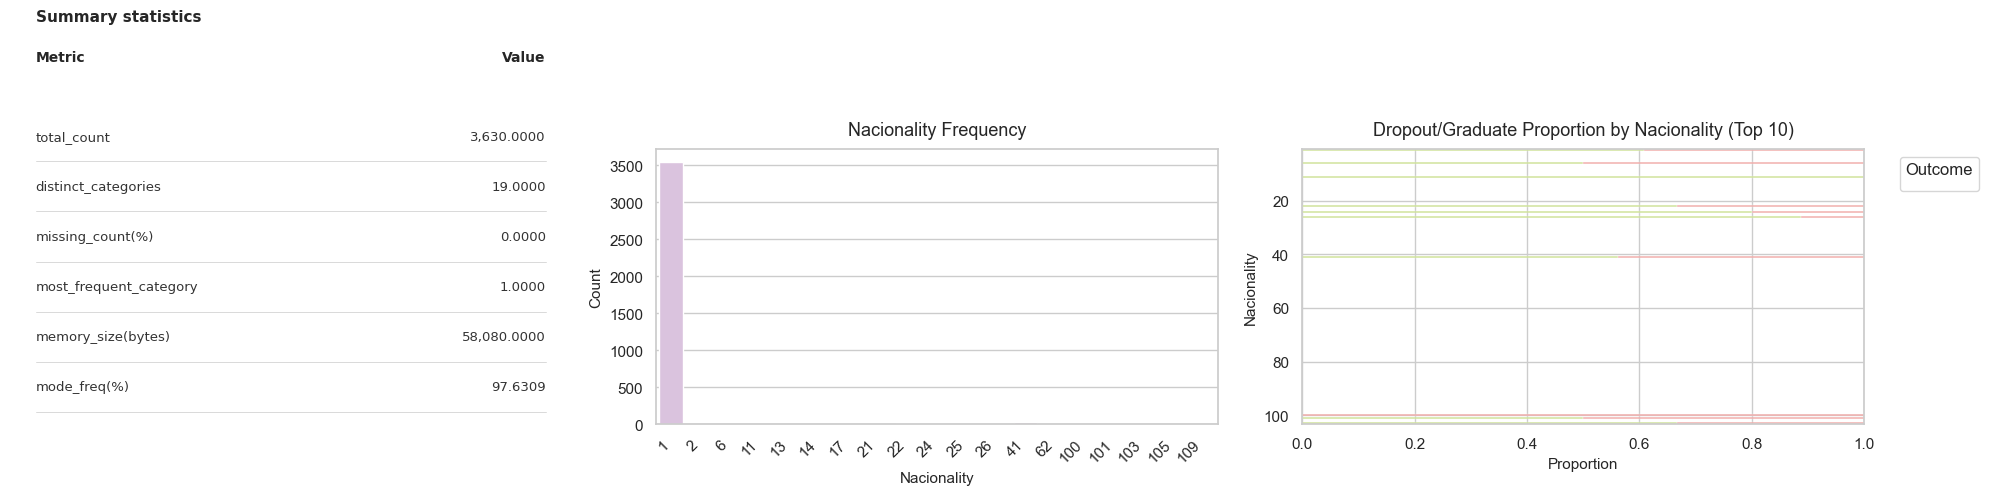

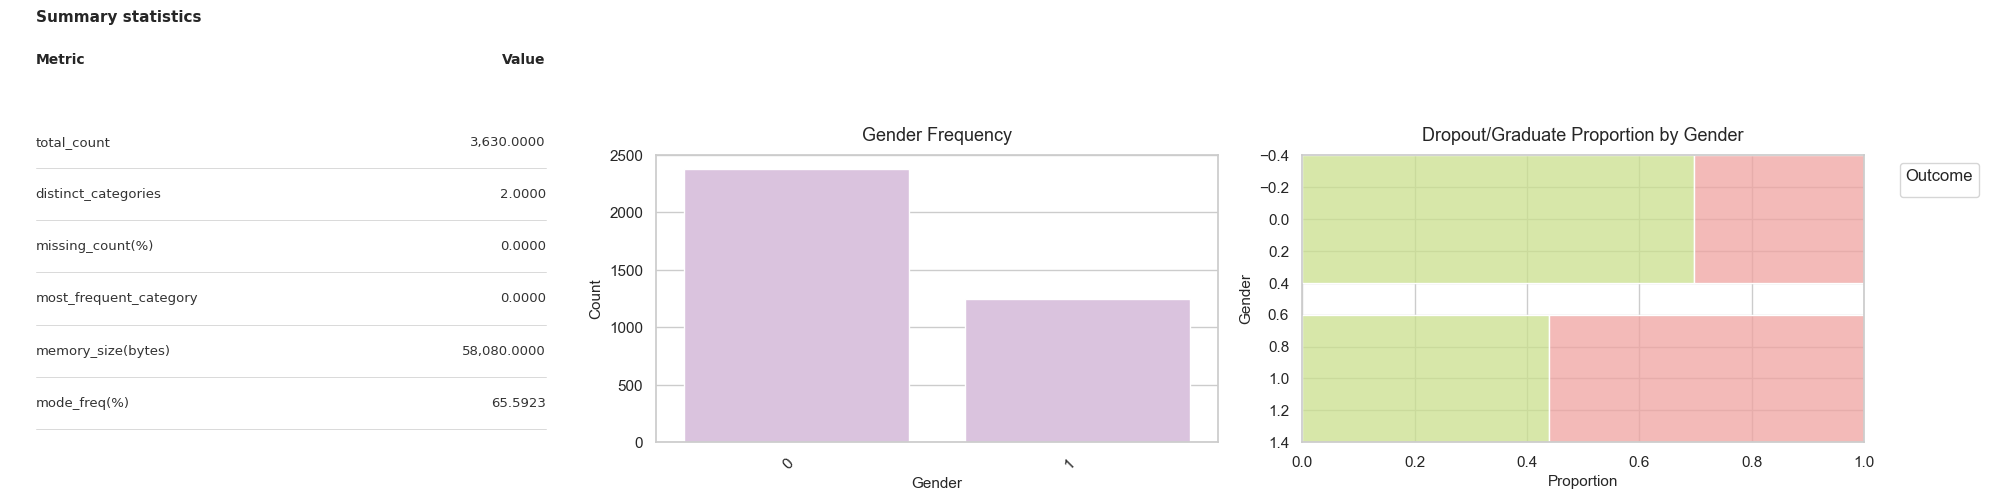

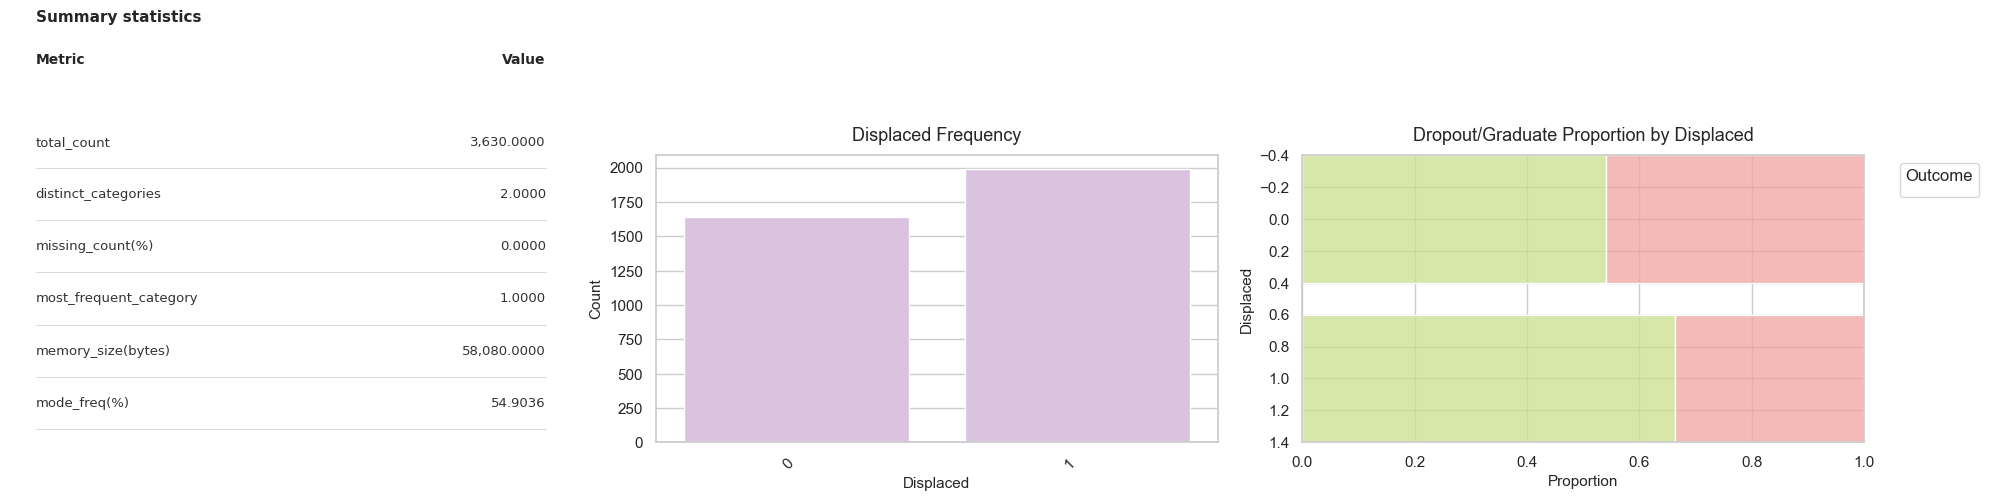

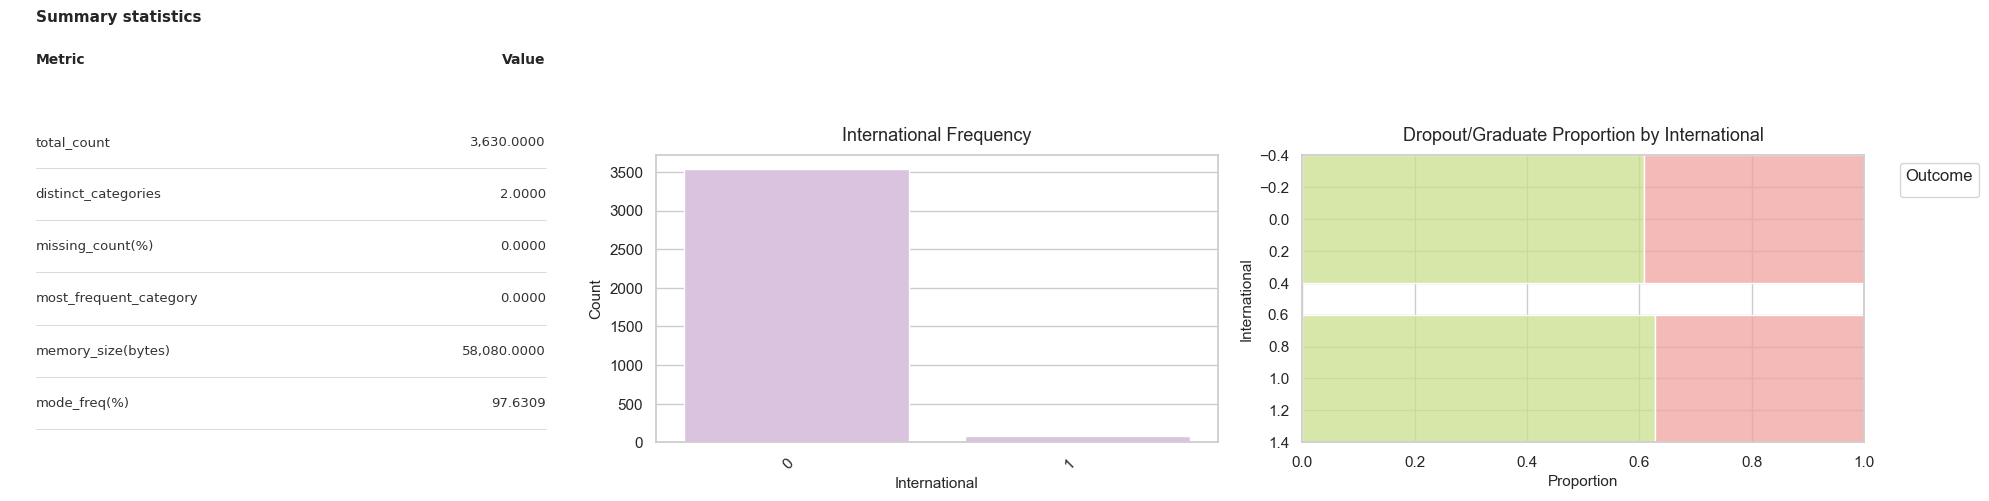

In [9]:
visualize_features_cards(df, numerical_demographic, categorical_demographic, target_col='Target')

**Age at enrollment**

- Strong right skew — most students are around 18–20, with a long tail up to age 70.
- Atypical older students are present in small numbers.

Older students may face more dropout risk. We might consider futuruly to create bins (e.g. ≤25, 26–35, 35+) for interpretability.

**Marital Status**
- The vast majority of students are in category 1, which likely represents "Single."

- Other categories are underrepresented → implies low demographic diversity on this variable.

*Implication* : Might have low predictive value unless married students are heavily correlated with dropout. Something to be checked later;

**Nationality**
- Extremely skewed — almost all students have the same nationality code (Portuguese).

- Few outliers at higher codes (maybe international students).

*Implication*: High imbalance makes it hard to learn patterns from nationality unless outliers behave very differently (e.g. higher dropout or success rates)


**Gender**

- Imbalanced, but still has both categories represented (likely 0 = female, 1 = male).

- Females appear to be ~65–70%.


**Displaced**

- Fairly balanced between 0 and 1 → both local and displaced students are represented.


**International**

- Almost all students are domestic (0). Very few international students.

*Implication*: Variable is nearly constant → may not contribute to the model.  Treating this variable will have to be done  carefully, we might consider delete it;

**B) Academic Backgroud Data**

Information about the student’s entry into the program – including previous qualification level (e.g. high school, prior degree), their admission grade (entry exam score or prior GPA), the degree program (course) chosen, and application details (application mode and order of preference) 

In [77]:
academic_background_features = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']

numerical_academic_background = []
categorical_academic_background = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']

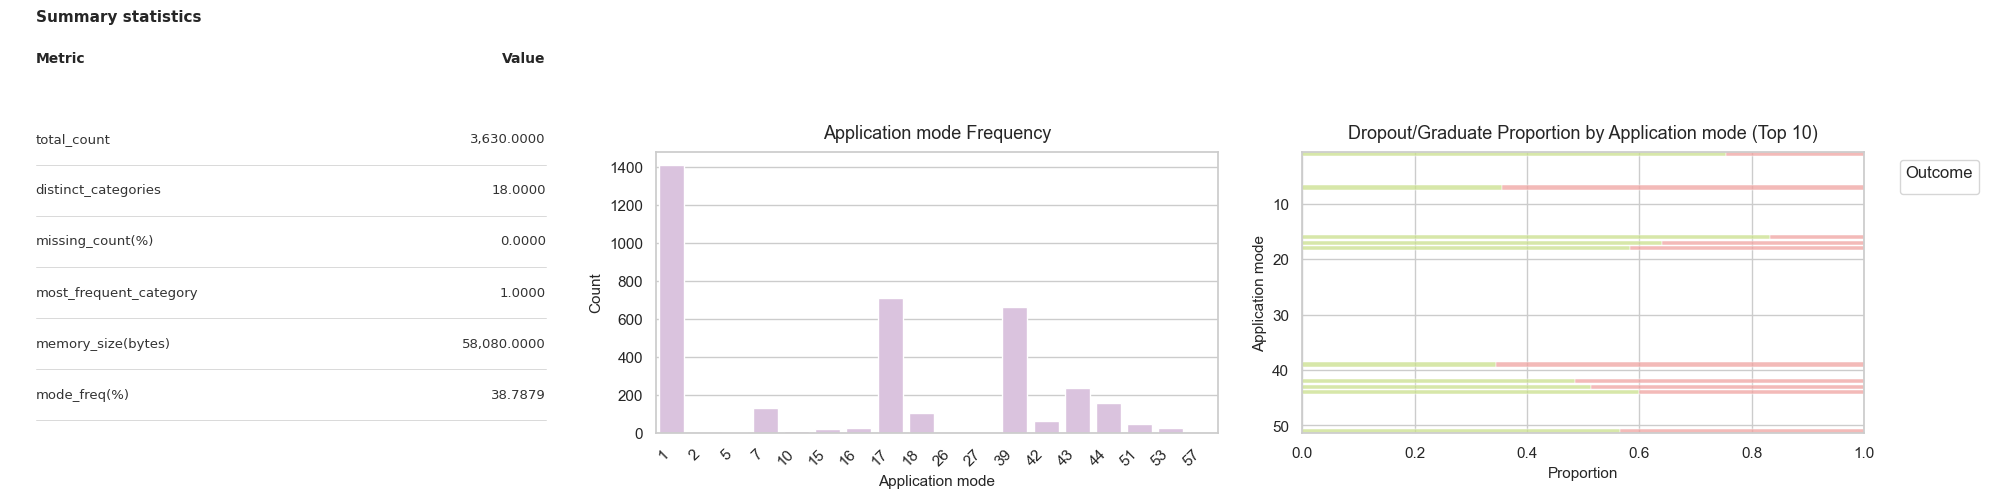

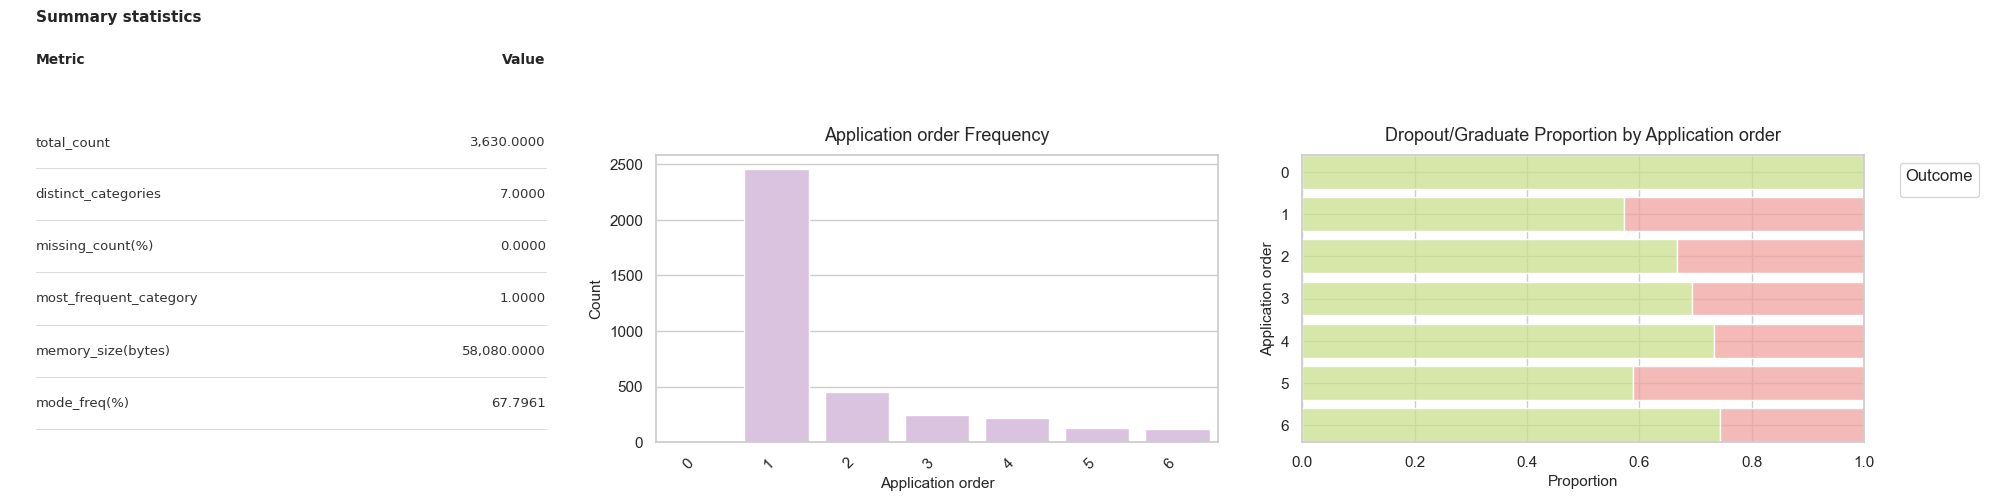

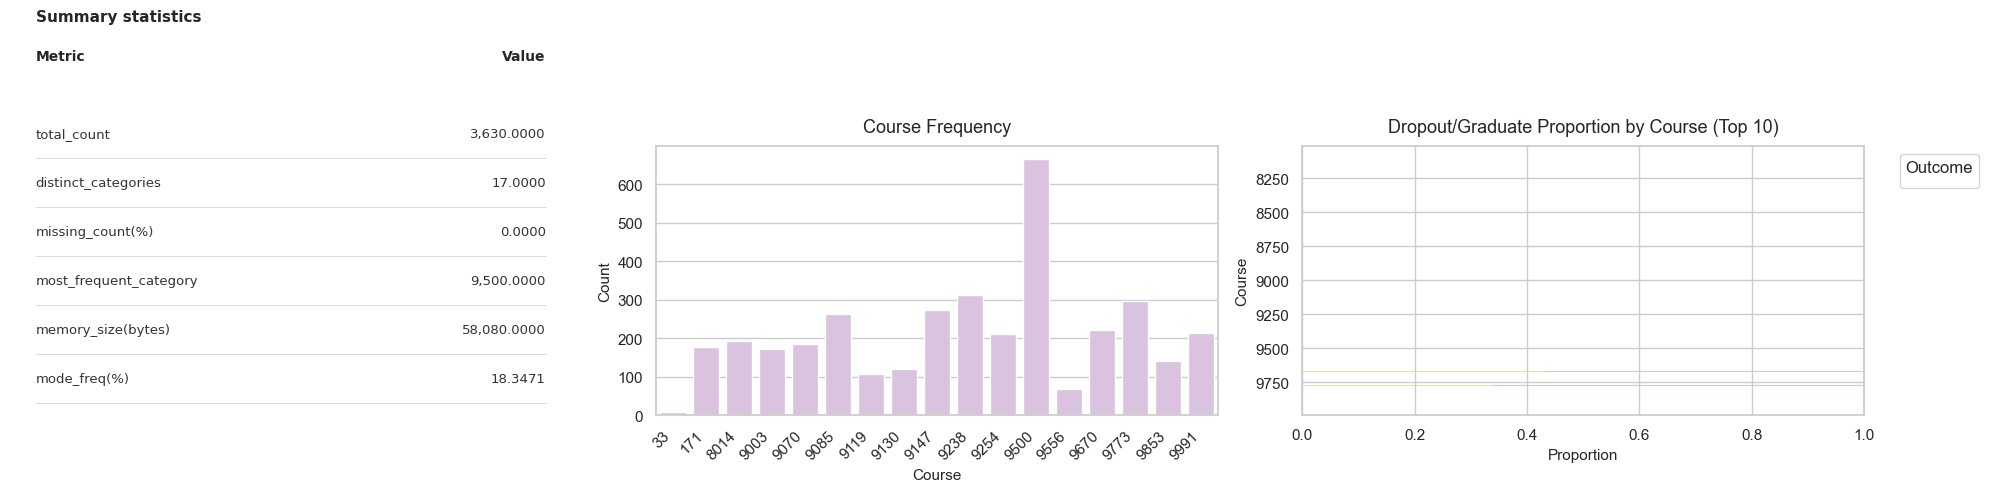

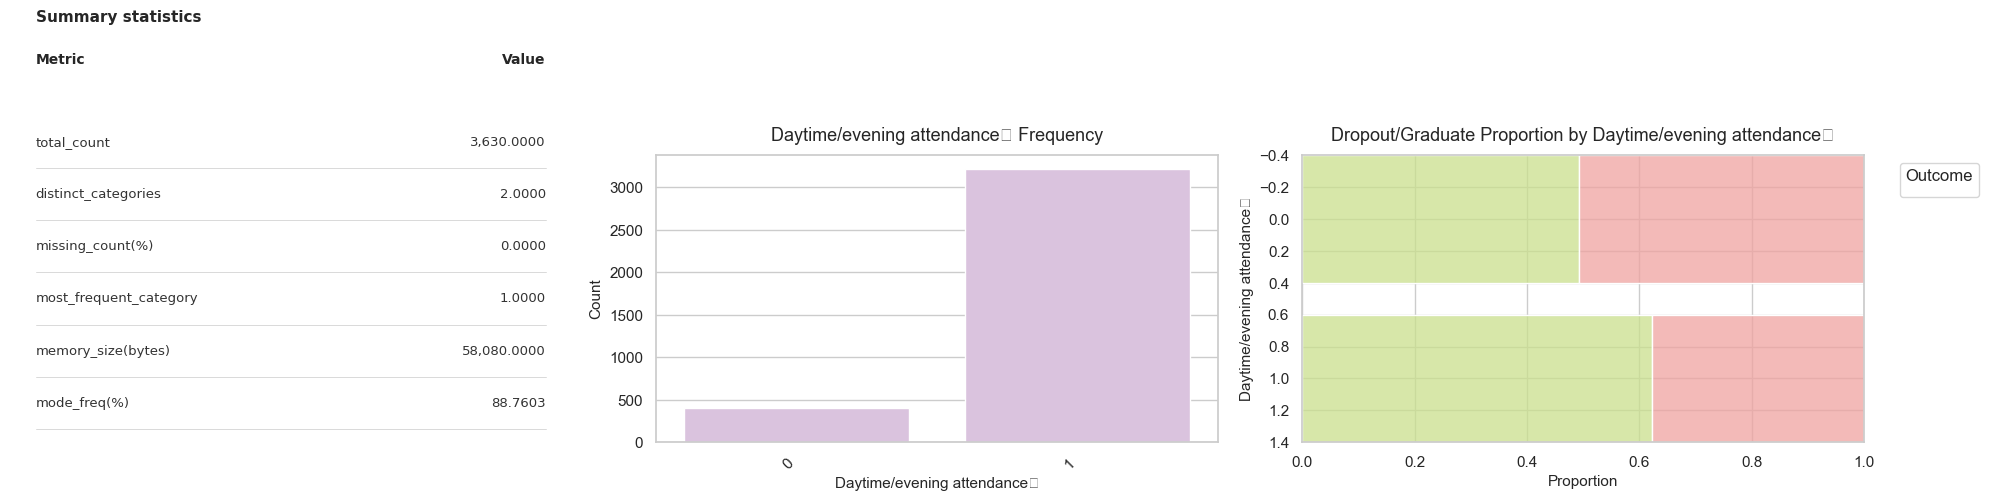

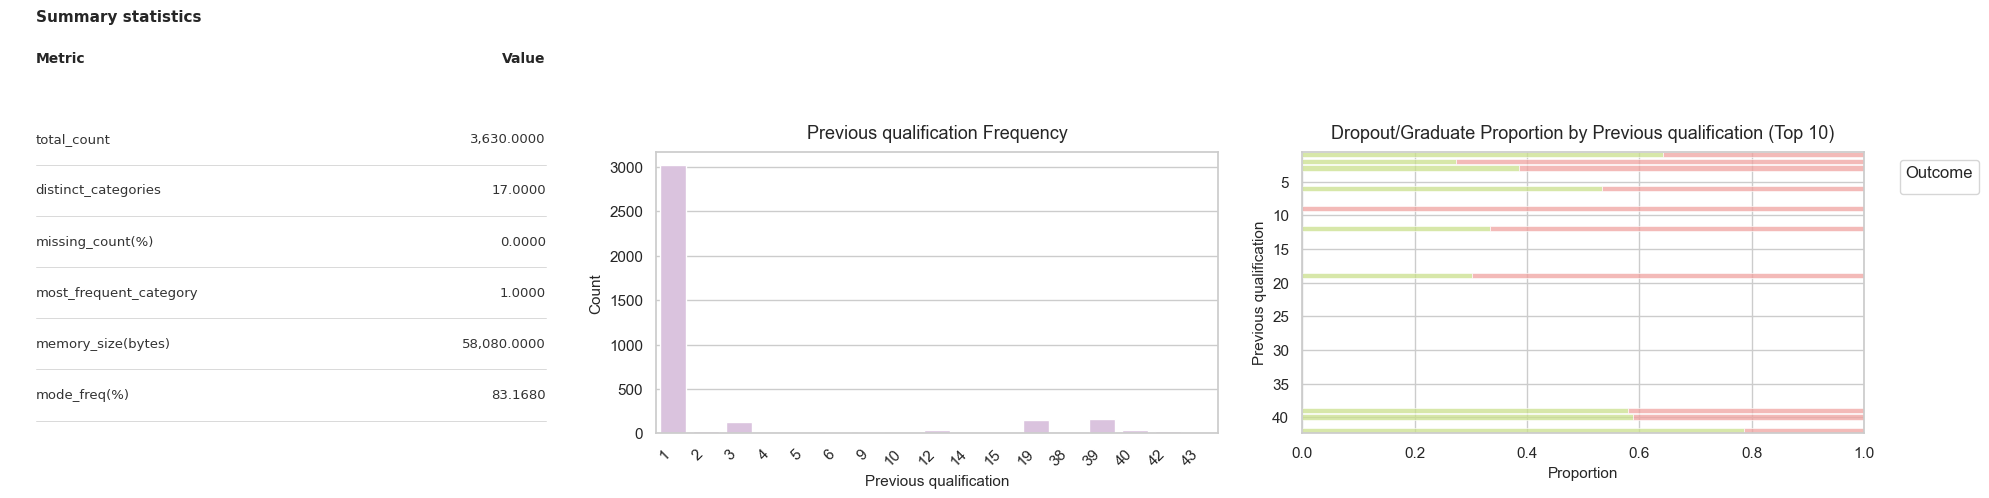

In [78]:
visualize_features_cards(df, numerical_academic_background, categorical_academic_background, target_col='Target')

**Application Mode**

- High Variability — There are many different categories (General Contingent, Over 23 years old, Change of Course, etc.).

- While "General Contingent" (standard entry) is likely the largest group, there is significant representation of "special" entry modes.


**Application Order**

- Strong Skew towards 1 — The majority of students are studying their first choice program.

- The frequency drops drastically as the order increases (2nd, 3rd, ... 6th choice).

- Implication: This acts as a proxy for Motivation. Students placed in their 4th, 5th, or 6th choice may have lower engagement and higher dropout risk because they are not in their preferred course.

**Course**

- Nominal / High Cardinality — Represents distinct degree programs (e.g., Nursing, Management, Engineering).

- No natural numerical order.


**Daytime/Evening Attendance**

- Binary (0/1) — Most students are likely Daytime (1).

- Evening students (0) usually correspond to working students or older demographics.


**Previous Qualification**

- Dominated by "Secondary Education" — Most students enter with a standard high school diploma.

- However, there are niche groups with "Basic Education" (older tiers) or "Higher Education" (students already having a degree).



**C) Socio-Economic Data**

In [12]:
socio_economic_features = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

numerical_socio_economic = []
categorical_socio_economic = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

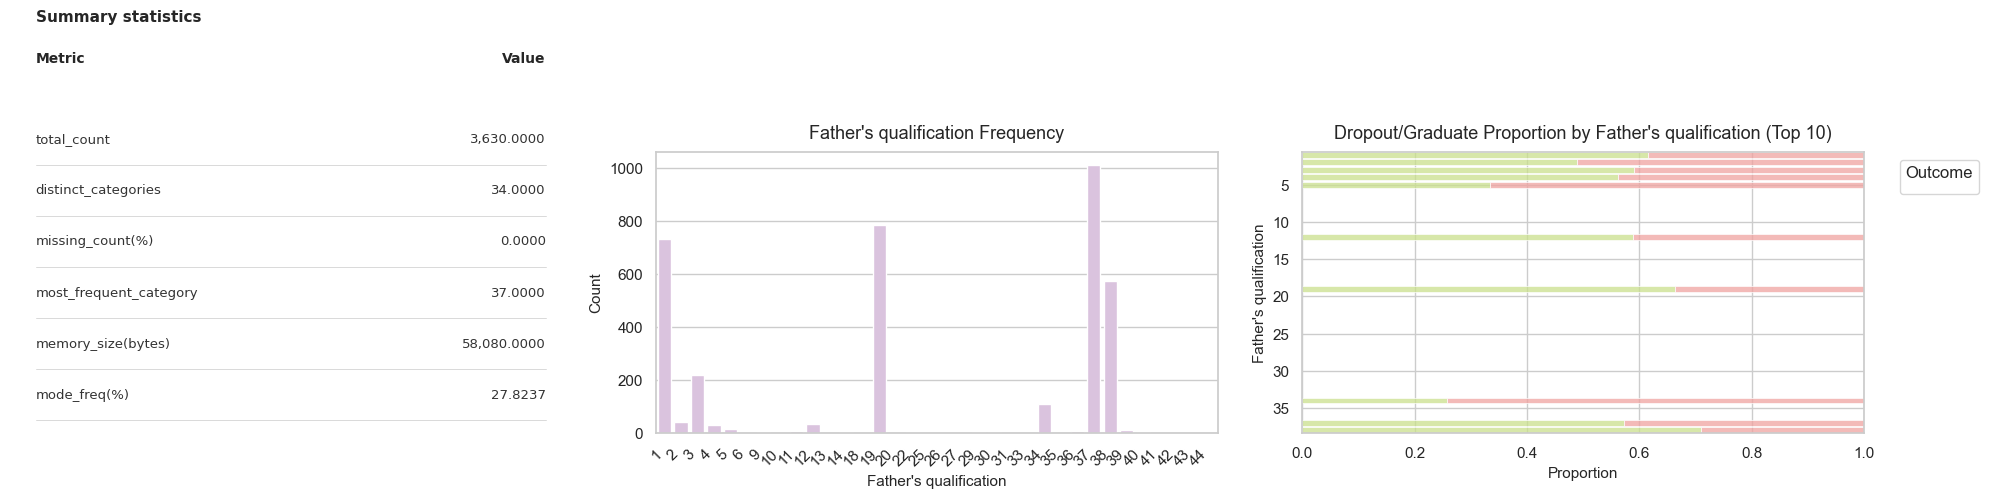

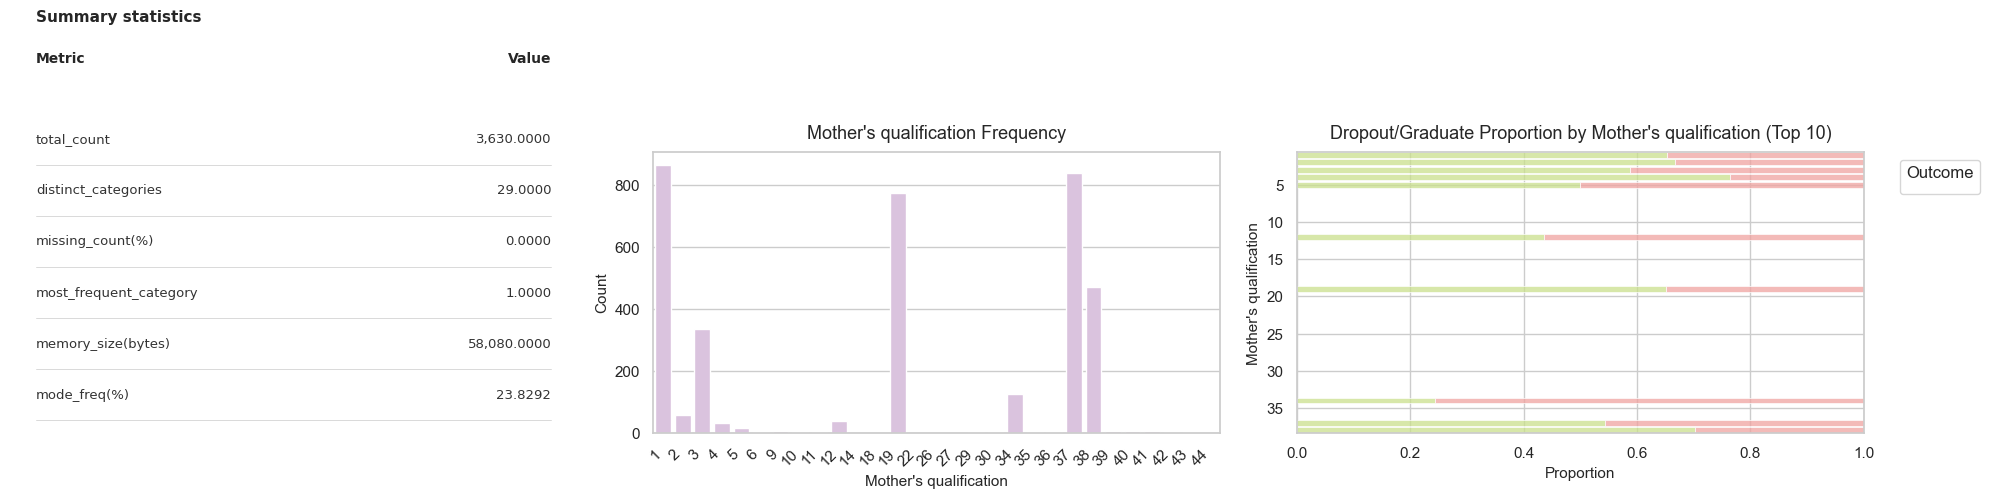

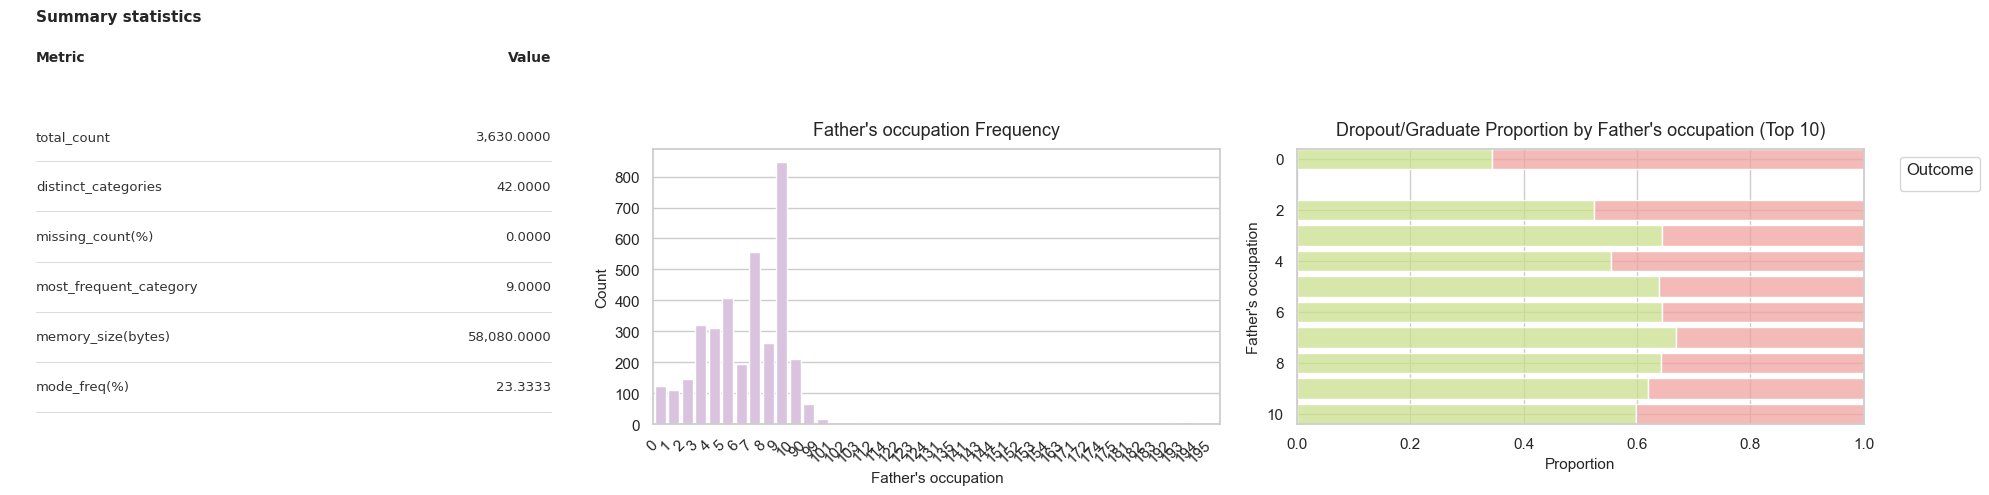

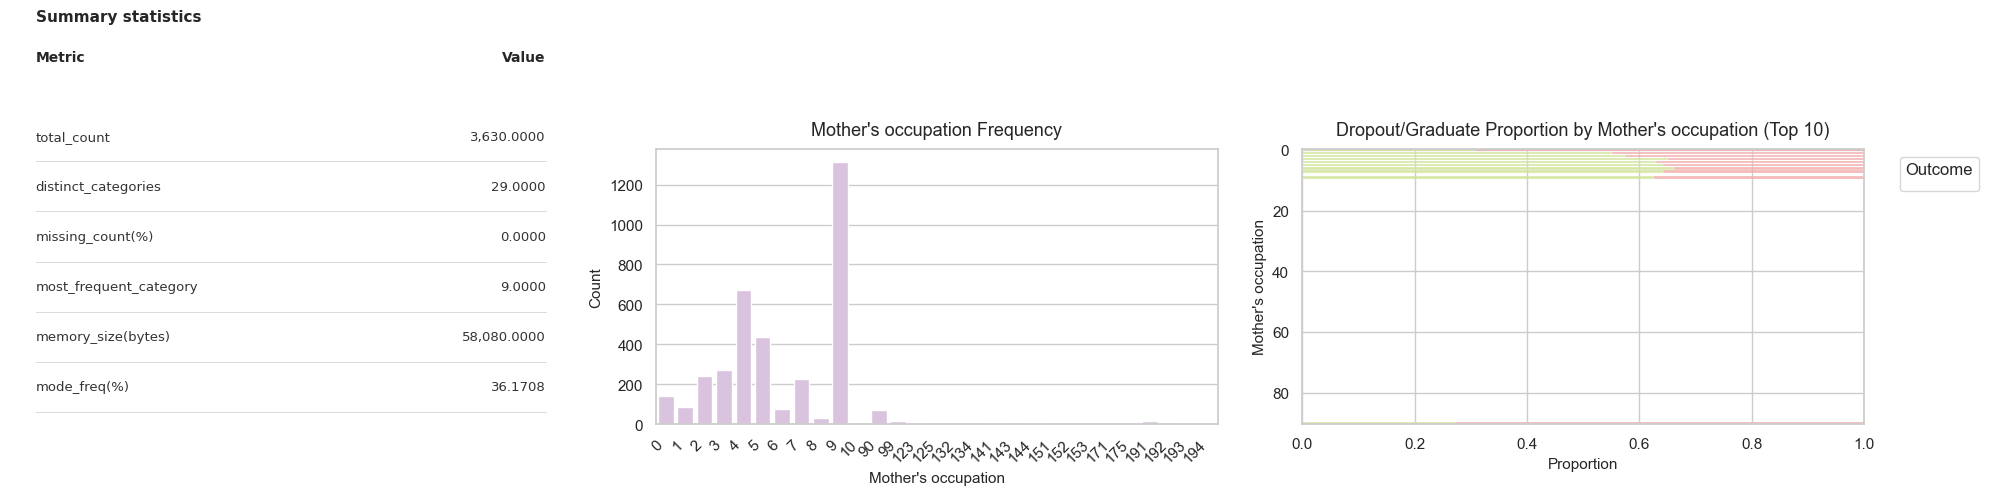

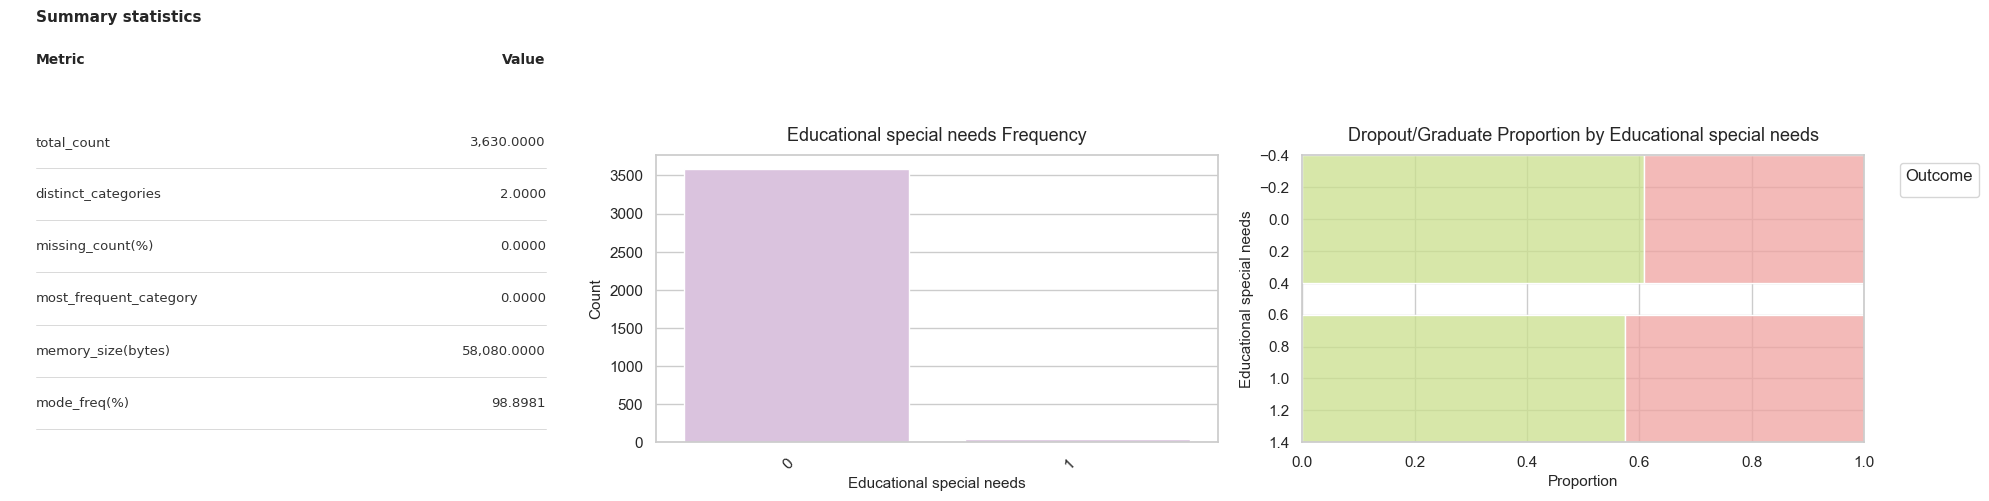

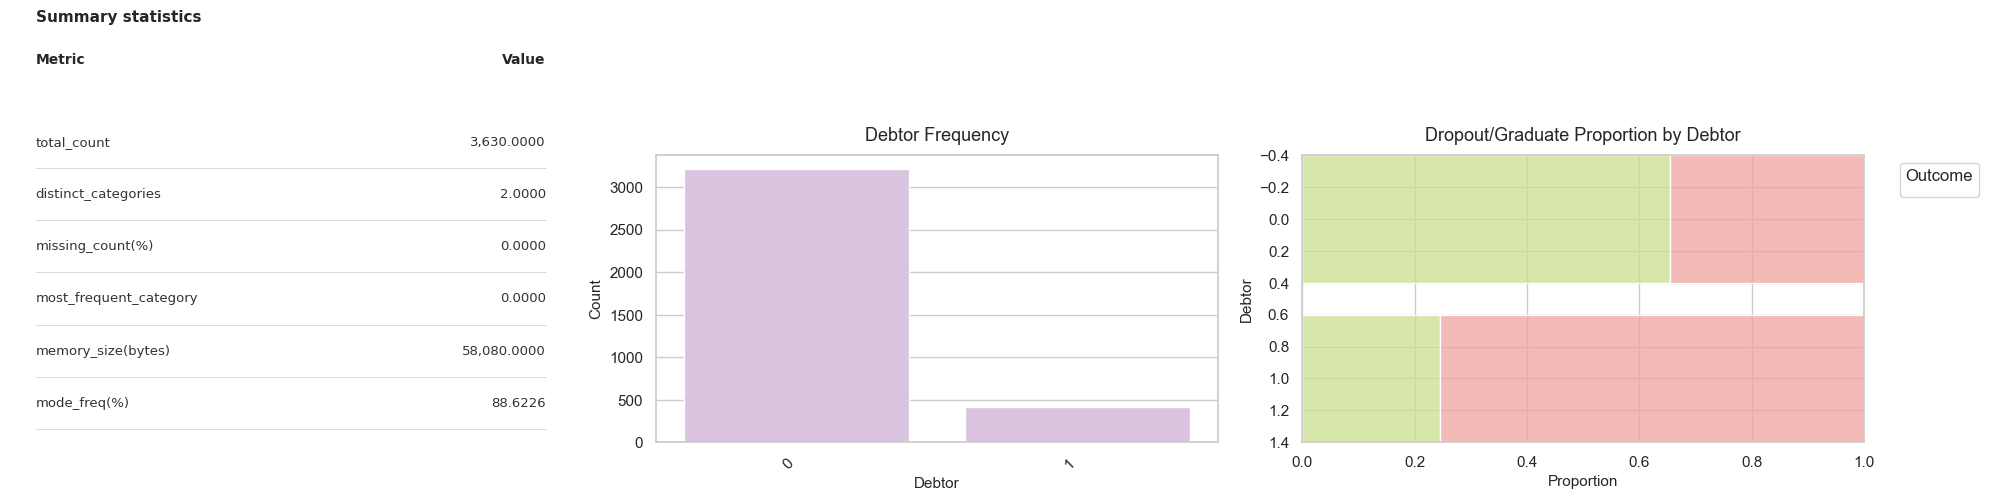

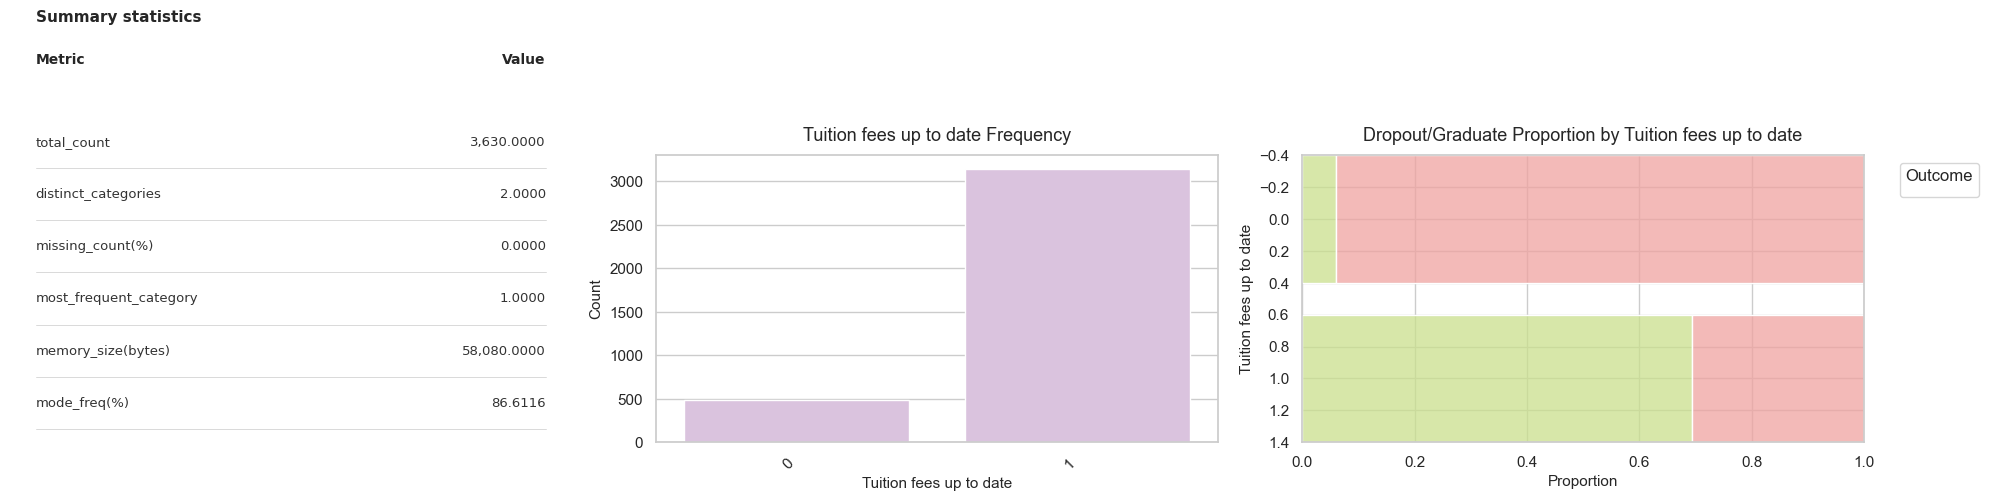

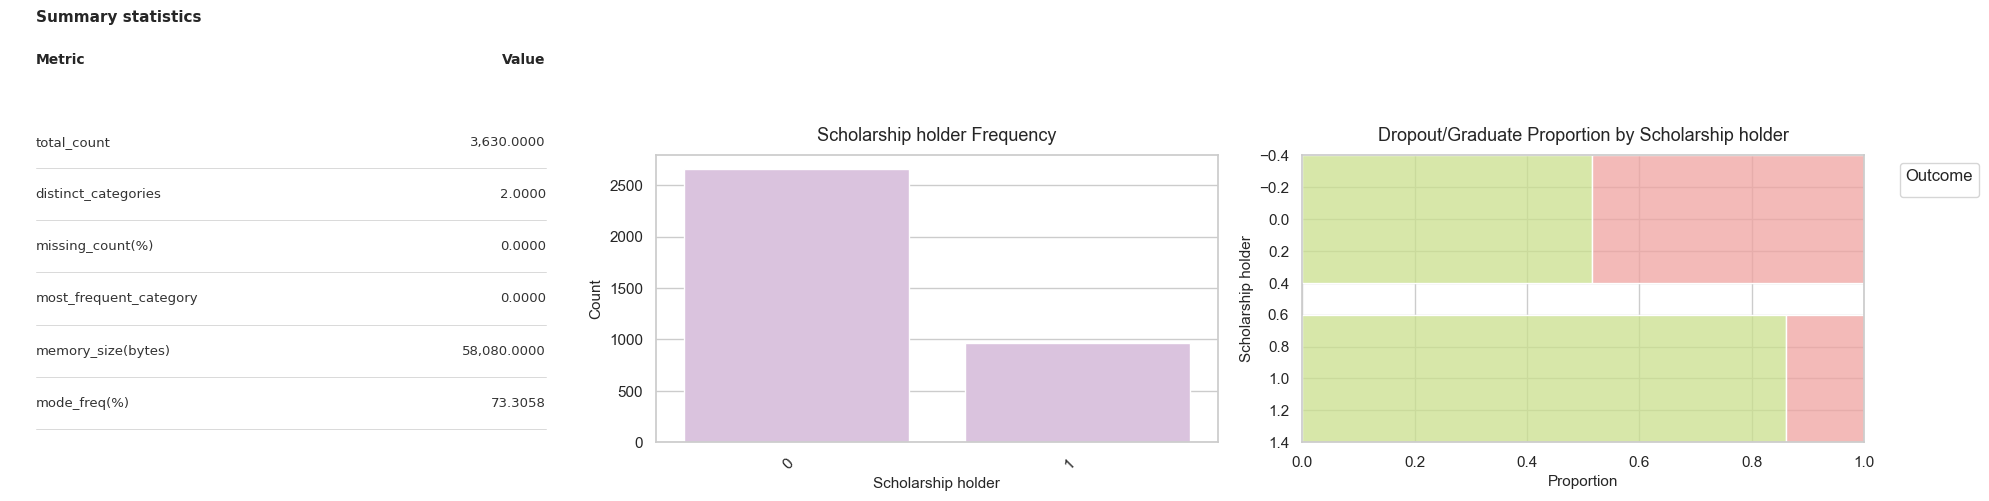

In [13]:
visualize_features_cards(df, numerical_socio_economic, categorical_socio_economic, target_col='Target')

**Scholarship Holder**

- Binary (0/1) — Represents students receiving financial aid.

Implication: This is likely a protective factor. Students with scholarships often have a double incentive to stay: financial relief and the academic requirement to maintain good grades to keep the scholarship.

**Tuition Fees Up to Date**

- Binary (0/1) — Indicates if the student's payments are current.

- Observation: There is usually a very sharp split here. Students with 0 (not up to date) are overwhelmingly likely to drop out.

- Implication: This is likely the single most powerful predictor in this dataset. It acts as a "behavioral proxy"—students often stop paying tuition before they formally drop out. In our XAI analysis (SHAP), we expect this to be the dominant feature.

**Debtor**

- Binary (0/1) — Indicates if the student has debts to the university.

- Implication: A massive "Red Flag" for financial instability. While not as immediate as "Tuition Fees," it signals structural financial distress, which is a leading cause of dropout.

**Mother's & Father's Qualification**

- High Cardinality / Ordinal — Ranging from Basic Education (4th grade) to Higher Education (PhD).

- Observation: The data often shows a strong correlation between mother's and father's education levels.

**Mother's & Father's Occupation**

- Nominal Codes — Represents specific job titles (e.g., "Unskilled worker", "Administrative staff").



**D) Macro-Economic Data**

In [14]:
macro_economic_features = ['Unemployment rate', 'Inflation rate', 'GDP']
numerical_macro_economic = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_macro_economic = []

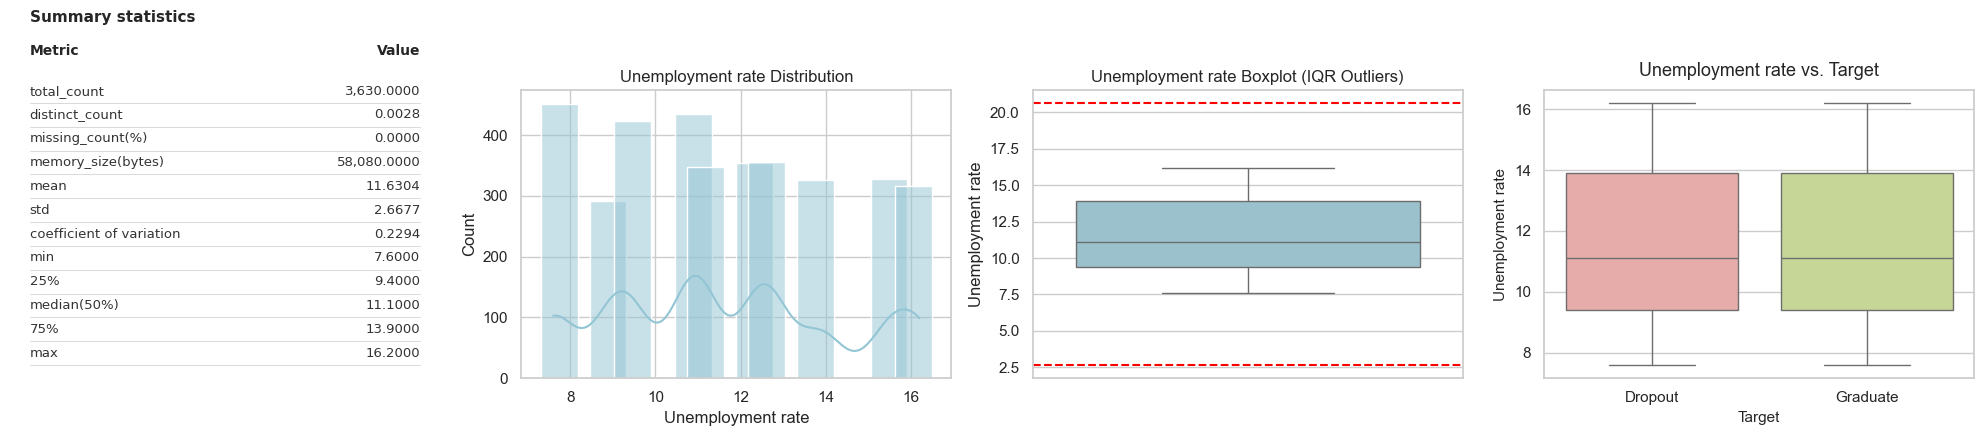

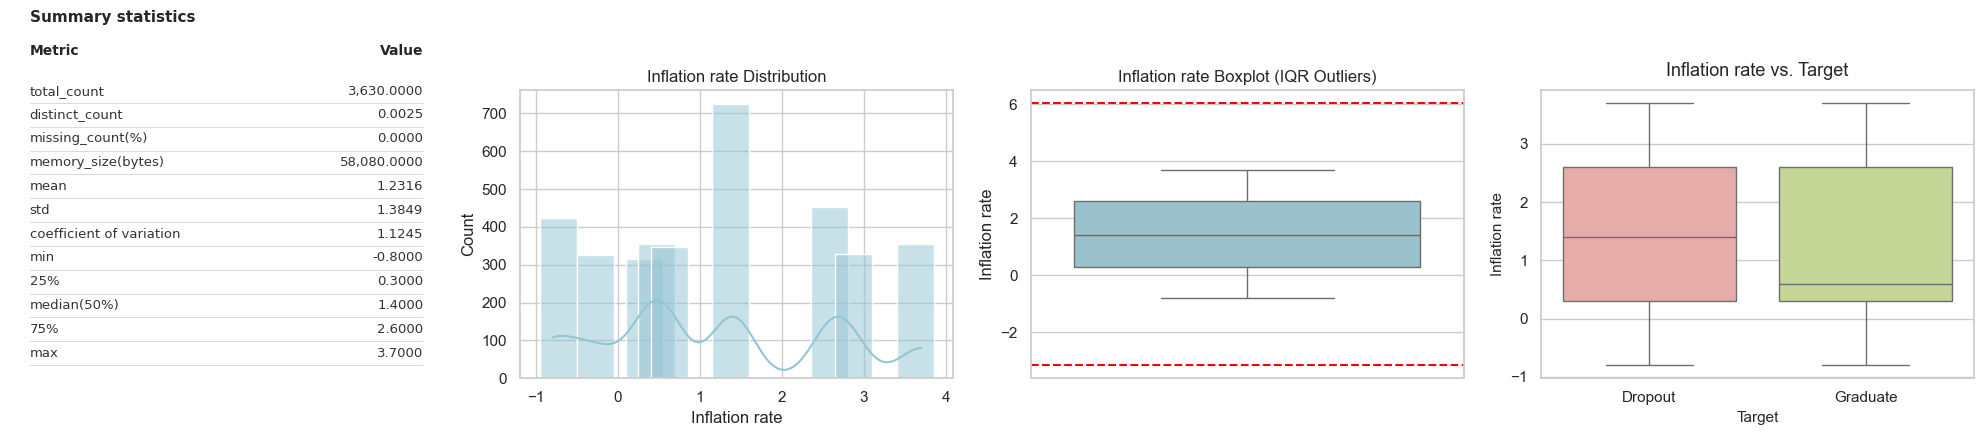

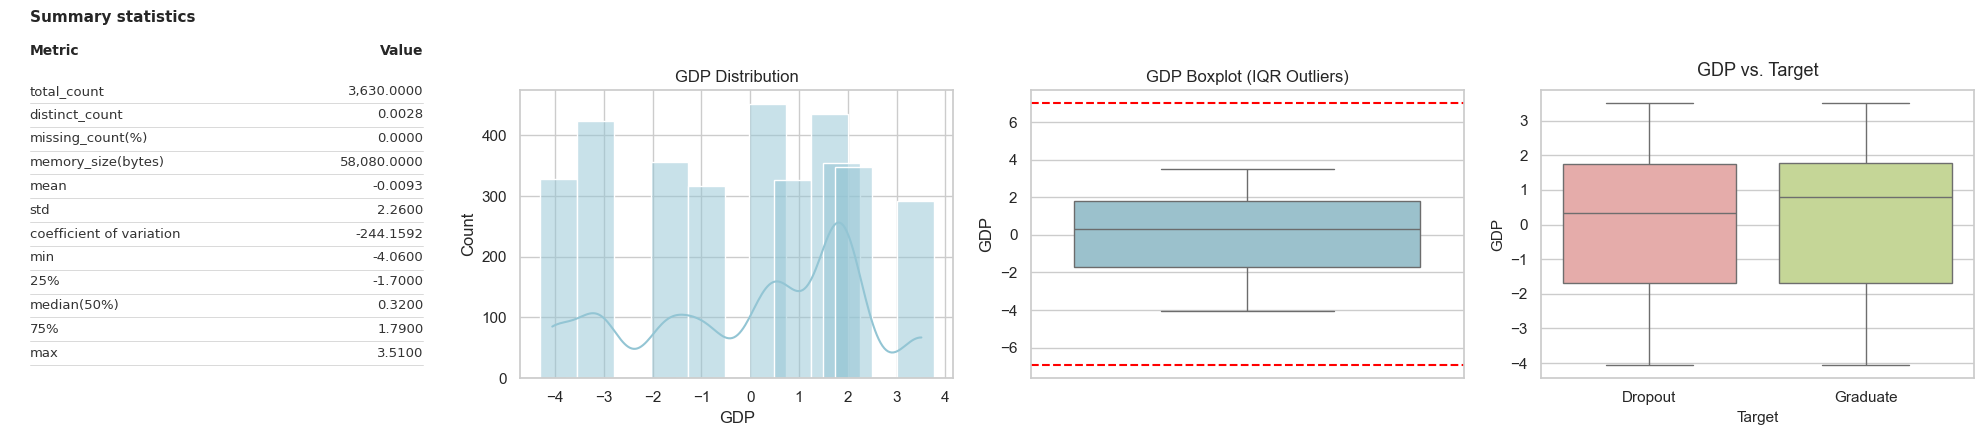

In [15]:
visualize_features_cards(df, numerical_macro_economic, categorical_macro_economic, target_col='Target')

**Unemployment Rate**

- Distribution: Varies (e.g., between 7% and 16%).

- Observation: This reflects the national economic climate.

**Inflation Rate**

- Distribution: Ranges from negative (deflation) to moderate inflation.

- Implication: Higher inflation increases the cost of living. For students on the financial edge (especially displaced students paying rent), a spike in inflation acts as a "stress multiplier," increasing the likelihood of dropout due to financial pressure.

**GDP (Gross Domestic Product)**

- Distribution: Fluctuates based on the economic year.

- Implication: GDP growth is usually a proxy for overall family financial health. When GDP is up, families can better support students, potentially lowering dropout rates. It often moves inversely to the Unemployment Rate.

**E) Academic Performance Data**

In [16]:
academic_performance_features = [
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (without evaluations)',

    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

numerical_academic_performance = academic_performance_features
categorical_academic_performance = []

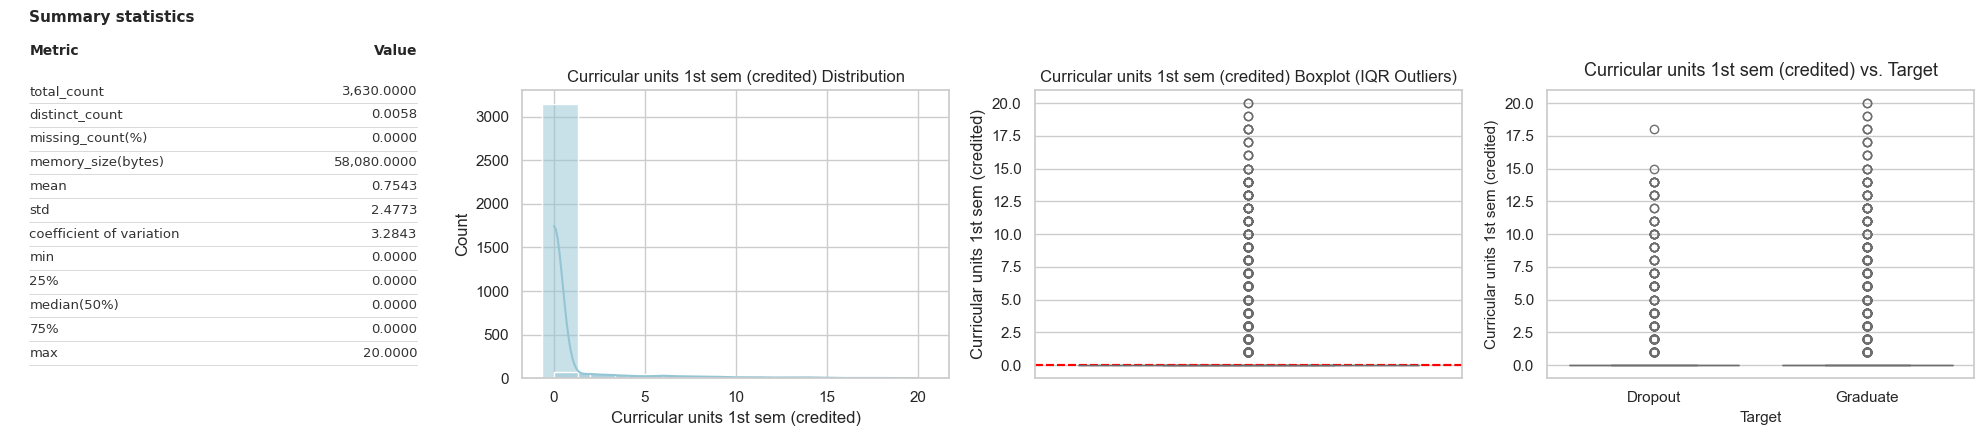

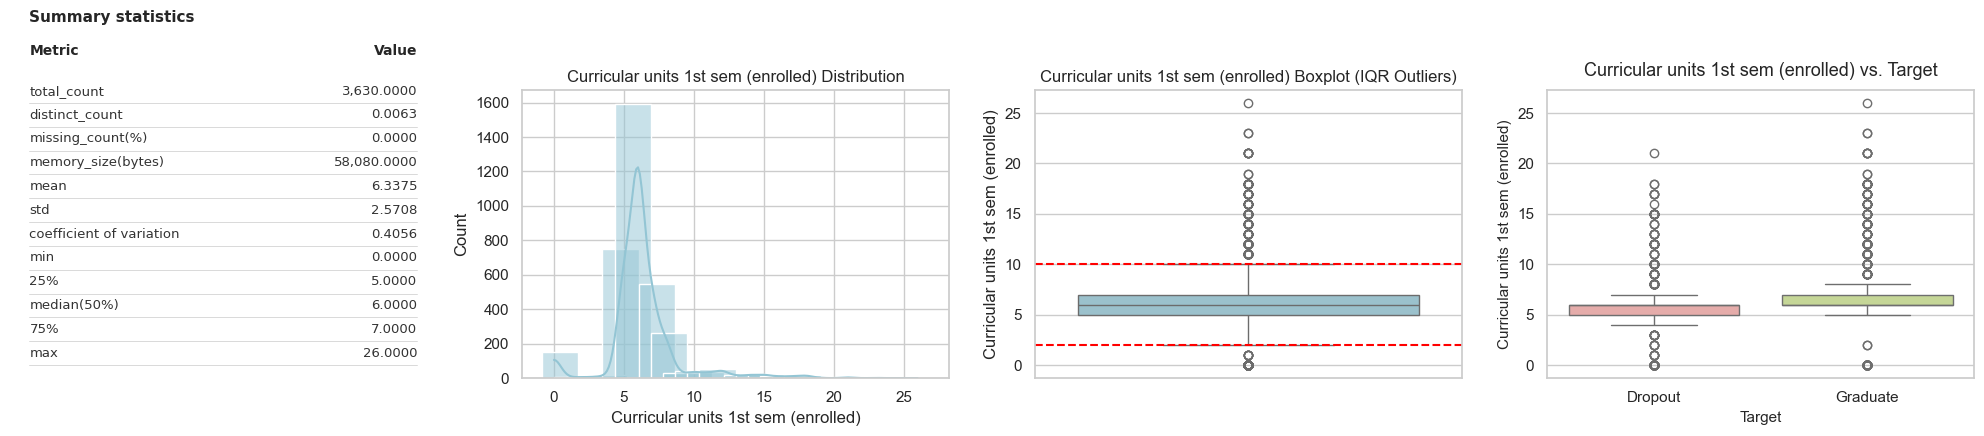

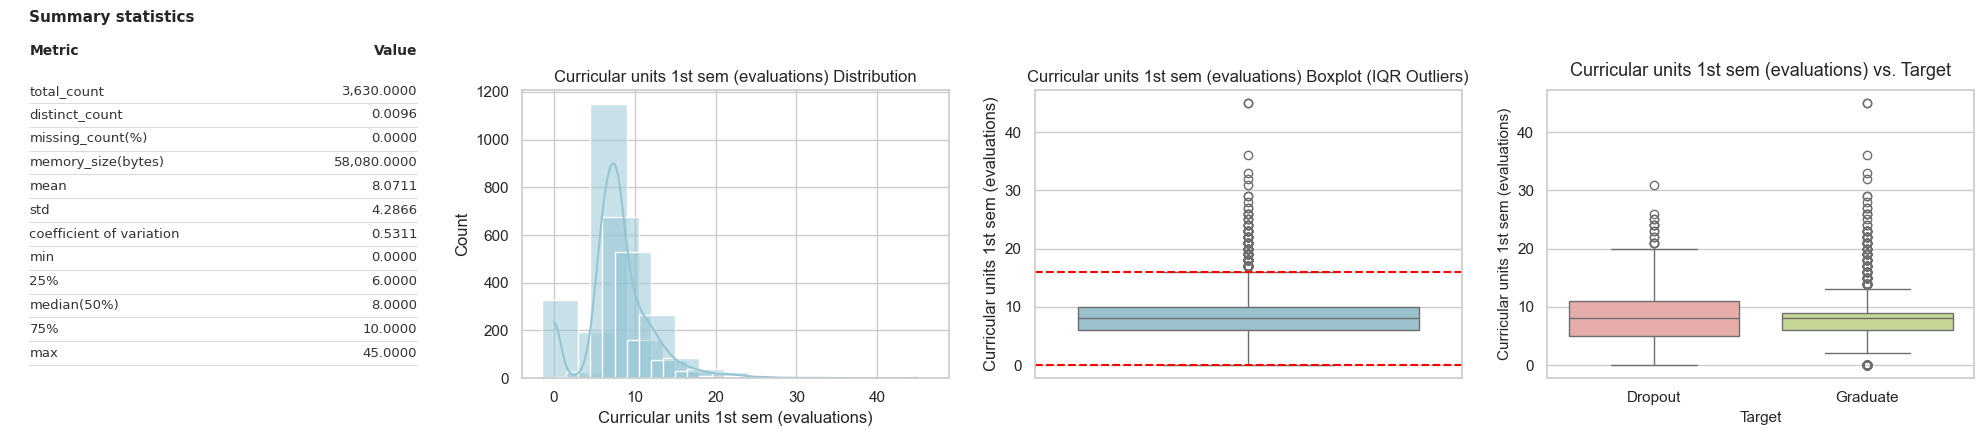

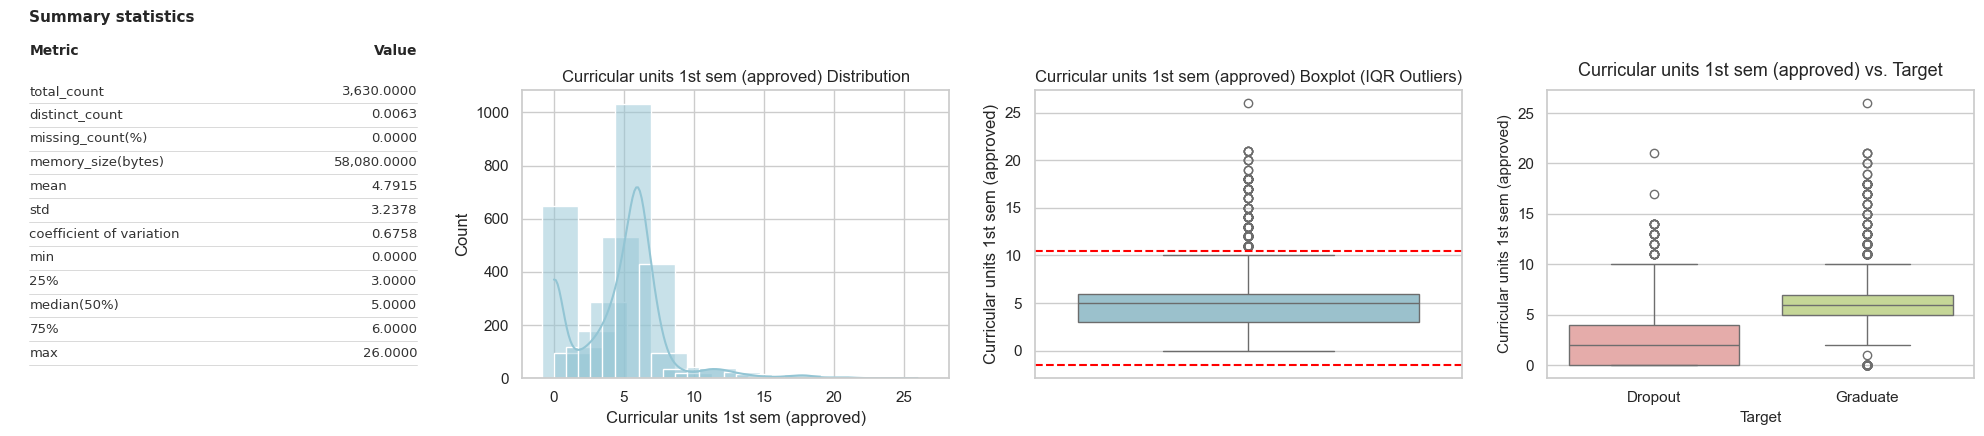

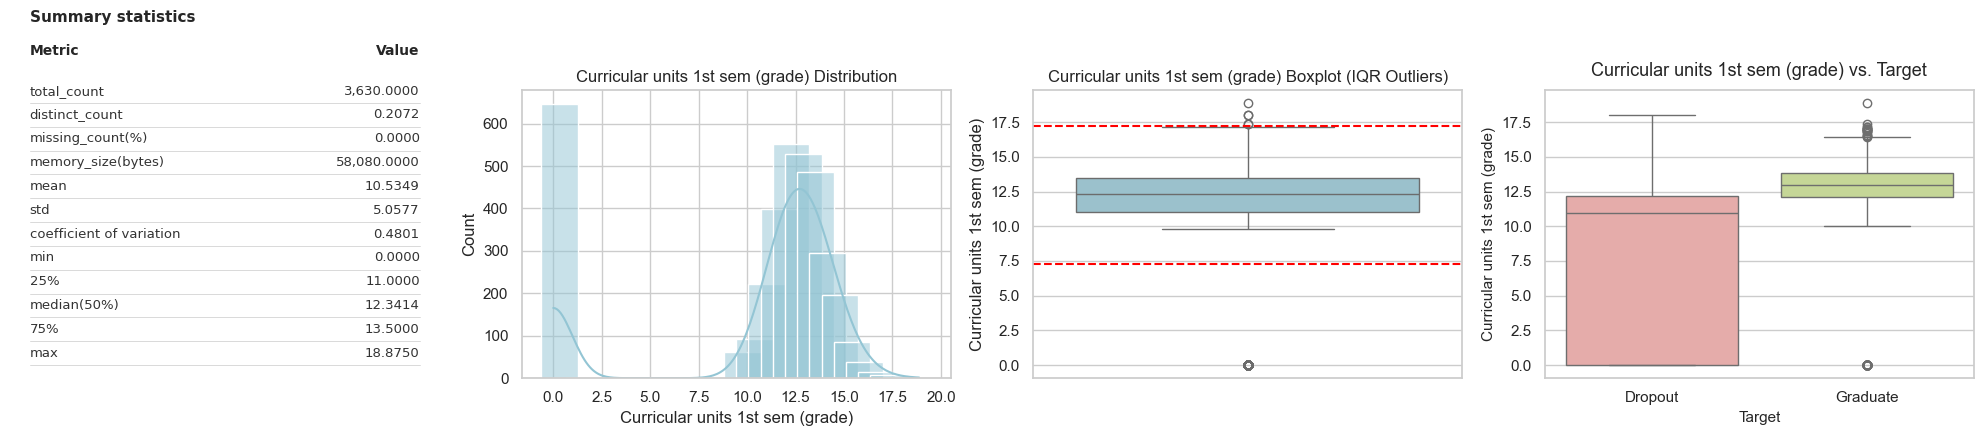

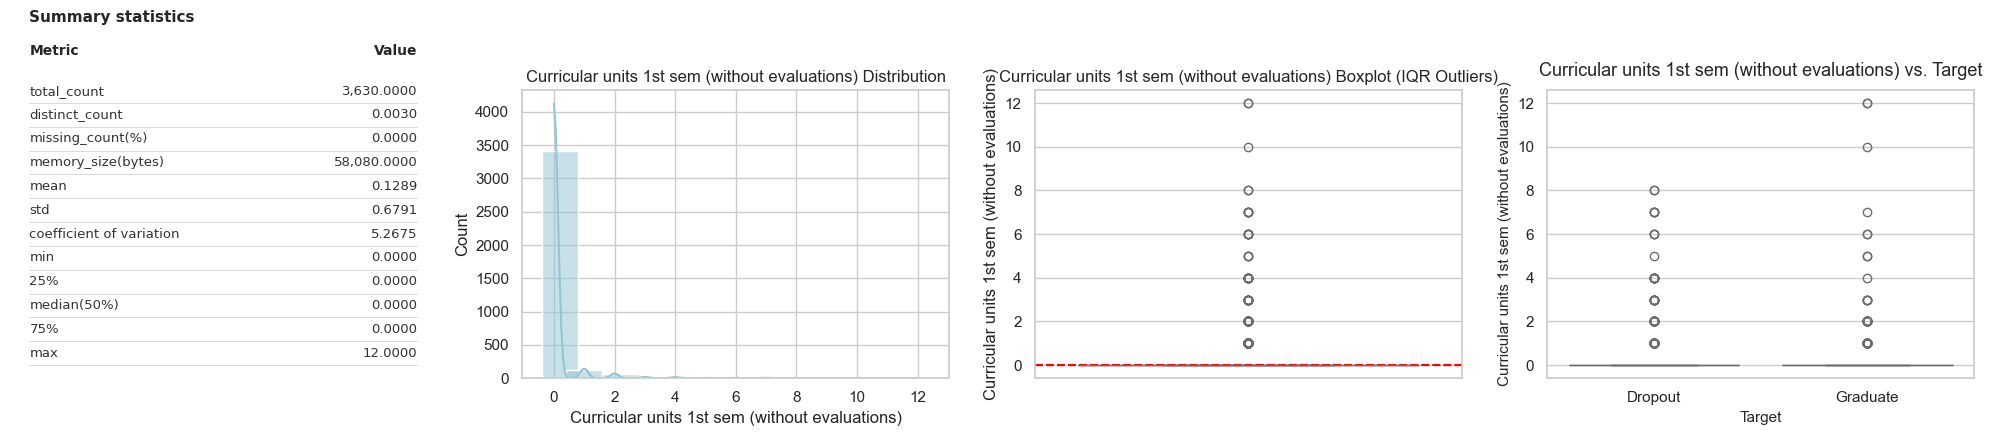

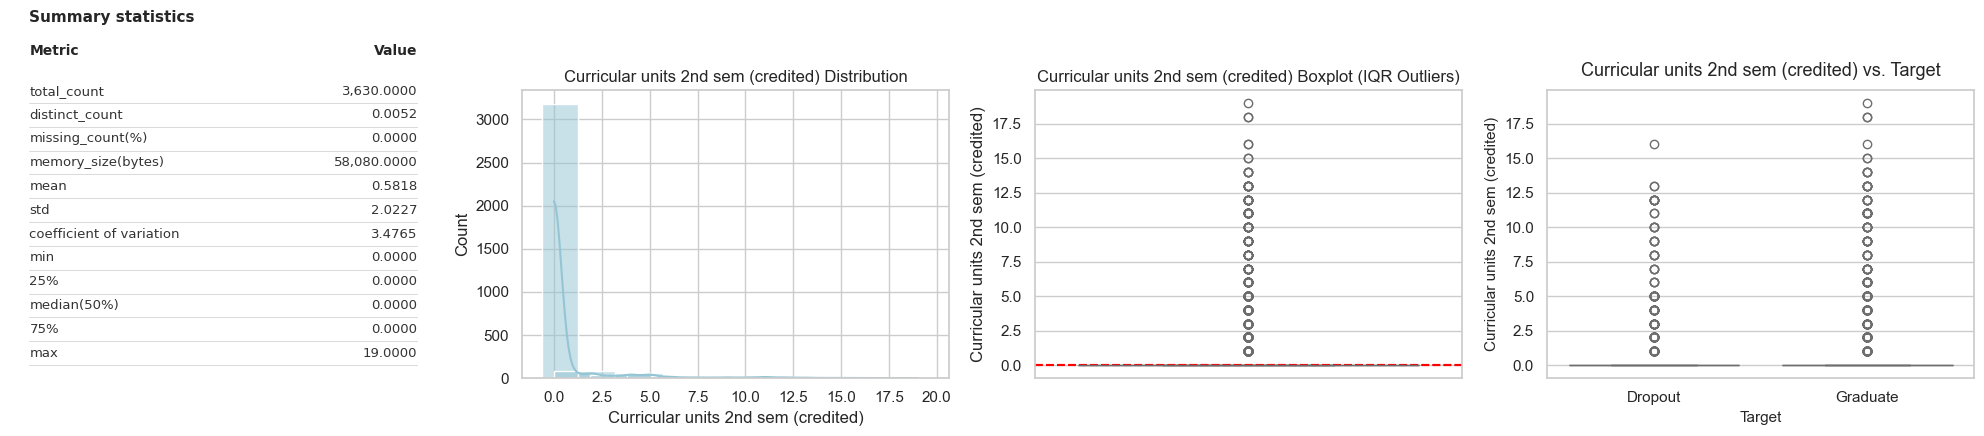

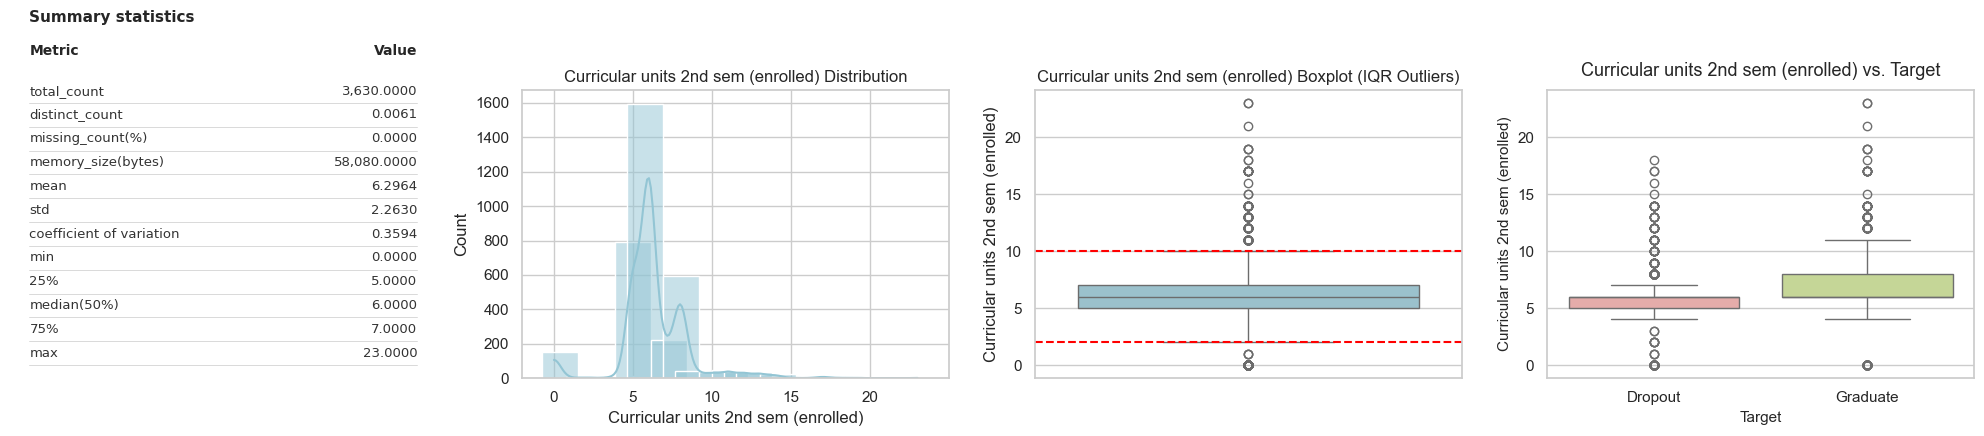

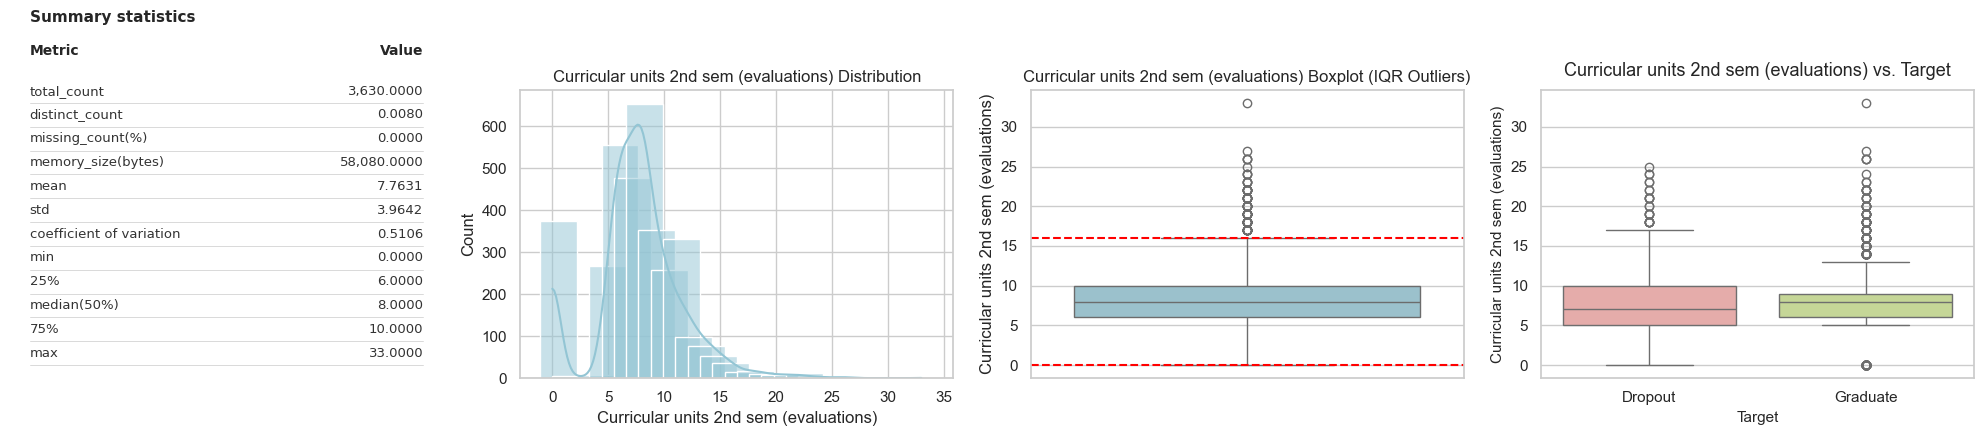

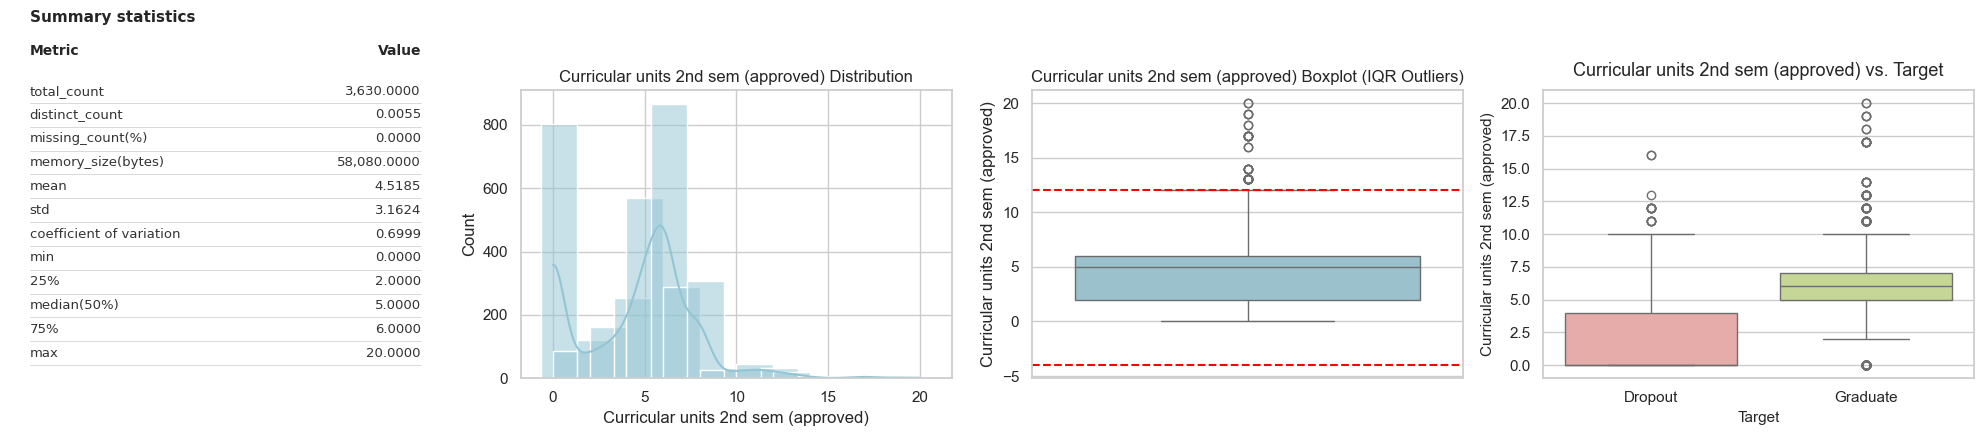

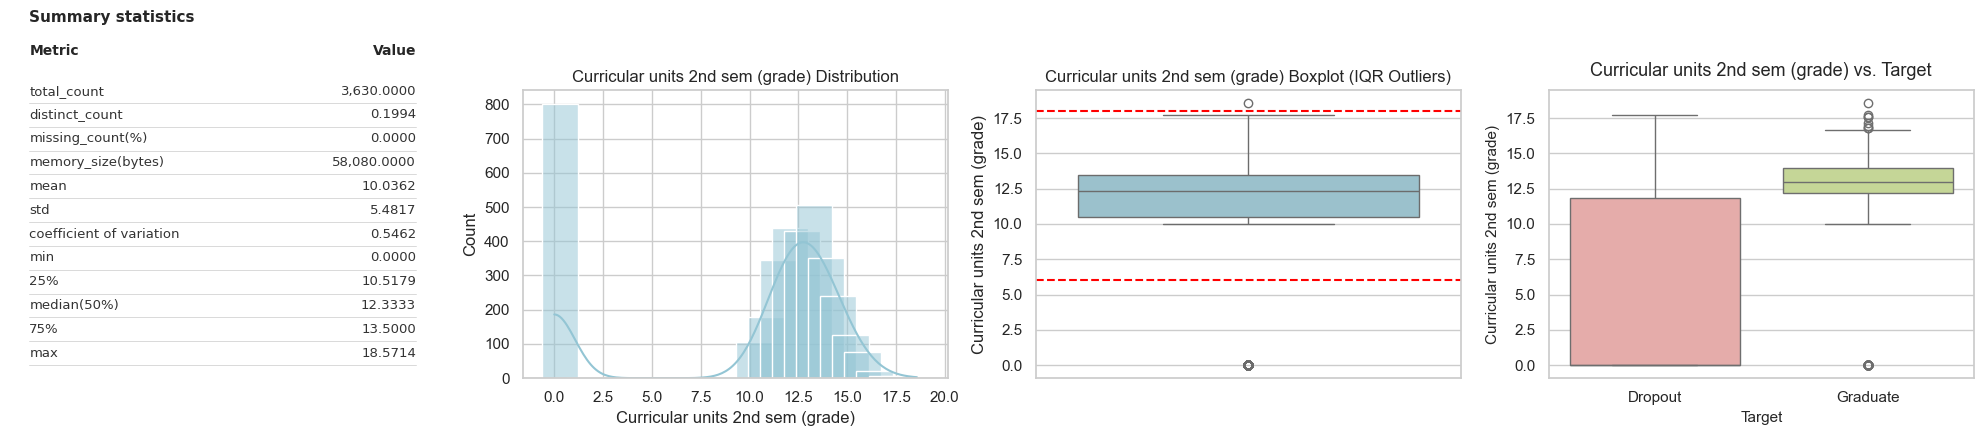

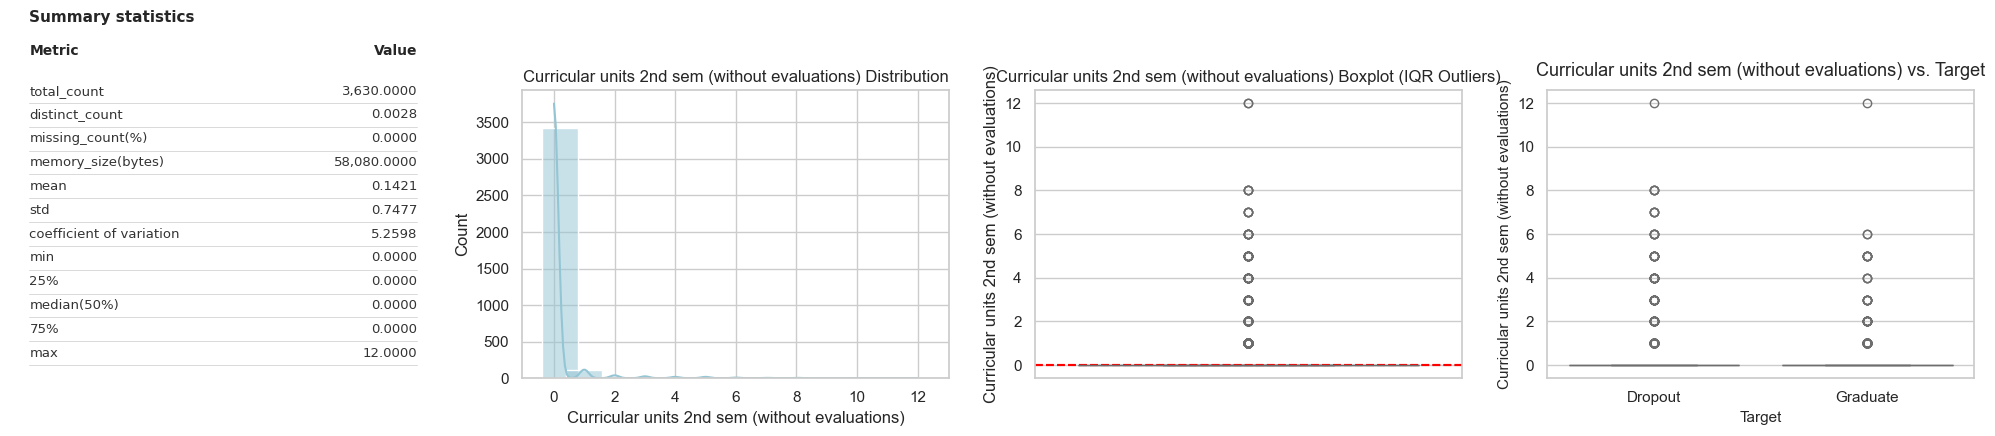

In [17]:
visualize_features_cards(df, numerical_academic_performance, categorical_academic_performance, target_col='Target')

**Curricular Units 1st & 2nd Sem (Approved)**

- Observation: Highly zero-inflated. A significant chunk of students has 0 approved units.

- Implication: This is likely the strongest predictor of dropout. If a student passes 0 units in the 1st semester, the probability of survival in the 2nd is mathematically very low.

**Curricular Units 1st & 2nd Sem (Grade)**

- Distribution: Typically follows a normal distribution between 10 and 18 (on a 0-20 scale), but with a massive spike at 0.

- Implication: The model will likely treat Grade = 0 as a proxy for "Dropout" or "Absent". 

**Curricular Units (Evaluations vs. Enrolled)**

- Observation: "Evaluations" can be higher than "Enrolled" (due to re-sit exams).

- Implication: This ratio measures Effort. A student with 10 evaluations but 0 approved units is trying but failing (academic struggle). A student with 0 evaluations and 0 approved units has likely already quit (disengagement).

**1st Semester vs. 2nd Semester**

- Observation: Extremely high correlation.

- Implication: This causes multicollinearity. In our XAI section, this explains why we might see "feature swapping" (the model picking 1st sem one time and 2nd sem another) or why PDP plots might fail (you can't fail 1st sem and ace 2nd sem easily).

**Multivariate Analysis**

- ***Analysing Correlations*** - analysing and quantifying the relation between features -> correlation matrix or heatmap
    
    Important about correlations:
    - Numeric vs. Numeric correlations: measured using Spearman's rank correlation coefficient
    - Categorical vs. Categorical correlations: measured using Cramer's V
    - Numerical vs. Categorical correlations: also use Cramer's V, where the numeric feature is first discritized

In [18]:
numeric_features = numerical_demographic + numerical_academic_background + numerical_socio_economic + numerical_macro_economic + numerical_academic_performance
categorical_features = categorical_demographic + categorical_academic_background + categorical_socio_economic + categorical_macro_economic + categorical_academic_performance

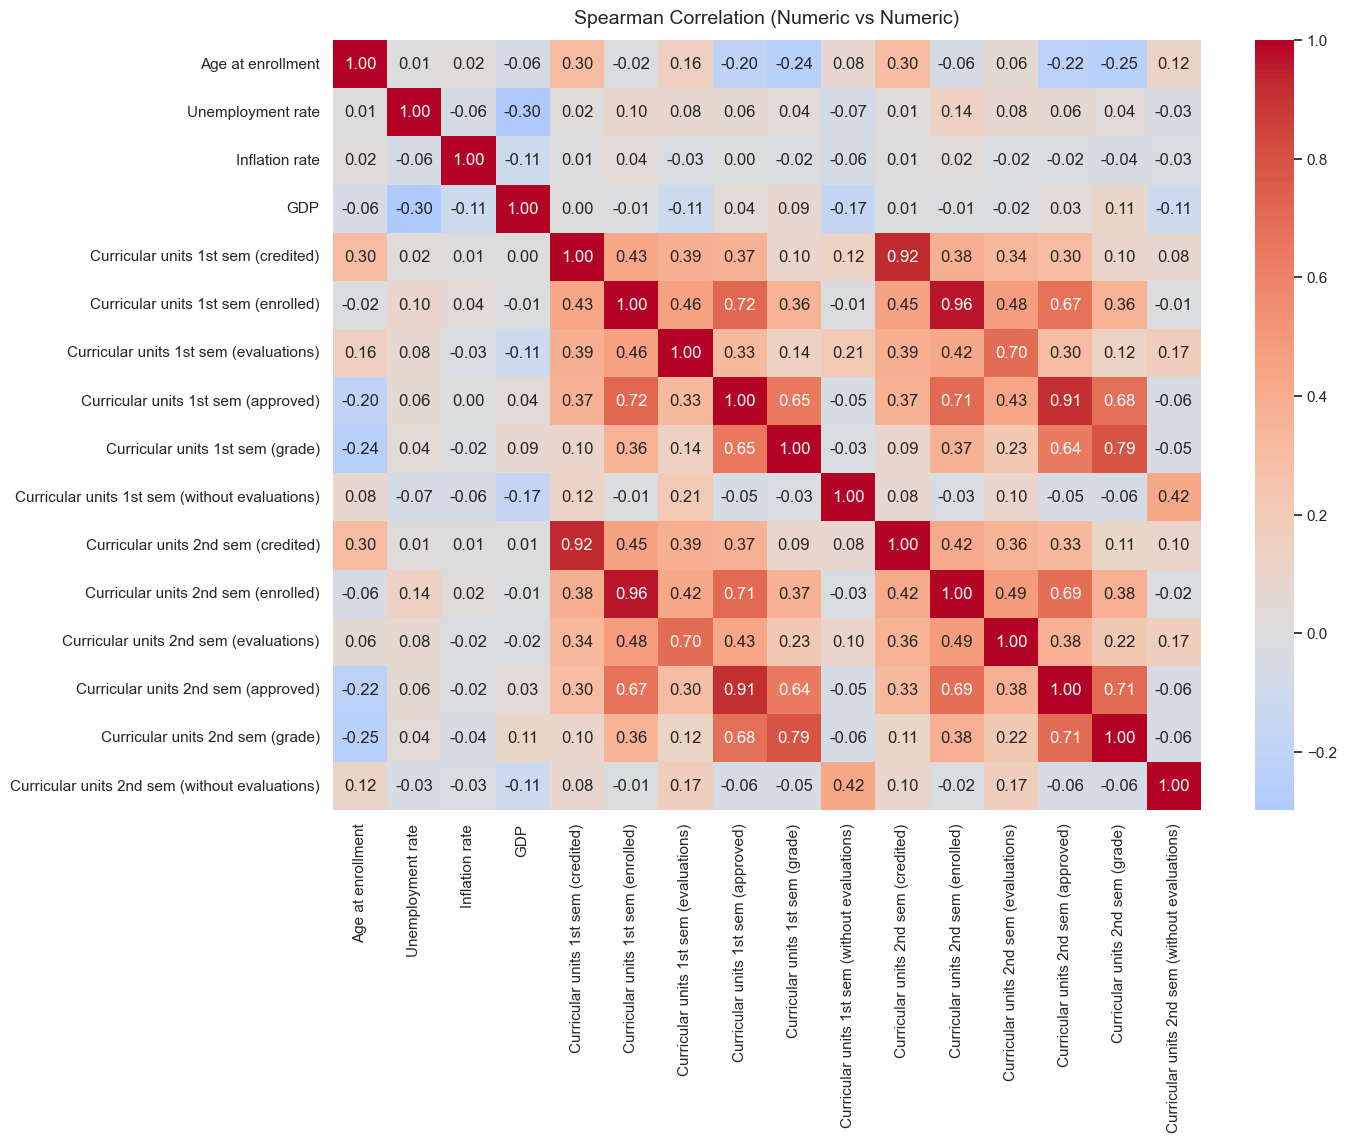

In [19]:
plot_numeric_correlation_matrix(df, numeric_features)

**1. The "Academic Momentum" Block (High Positive Correlation)**

- 1st Sem vs. 2nd Sem Grades (r≈0.8): There is a massive correlation between performance in the first and second semesters.

- Implication: This confirms that student performance is consistent. It also creates a multicollinearity issue for linear models—the model doesn't need both semesters to make a good guess. 

**2. The "Inflation-GDP" Inverse Link (Negative Correlation)**

- Unemployment vs. GDP (r≈−0.7): A classic macroeconomic relationship (Okun's Law). When the economy grows (GDP ↑), unemployment usually falls.

- Implication: We shouldn't feed both into a simpler model without regularization, as they provide redundant information about the "state of the economy."

**3. Age vs. Performance (Negative Correlation)**

- Age vs. Grades (r≈−0.2): Older students tend to have slightly lower grades or fewer approved units.

- Implication: This reinforces the "non-traditional student" risk factor. Older students likely have job/family conflicts that lower their academic throughput compared to 18-year-olds.



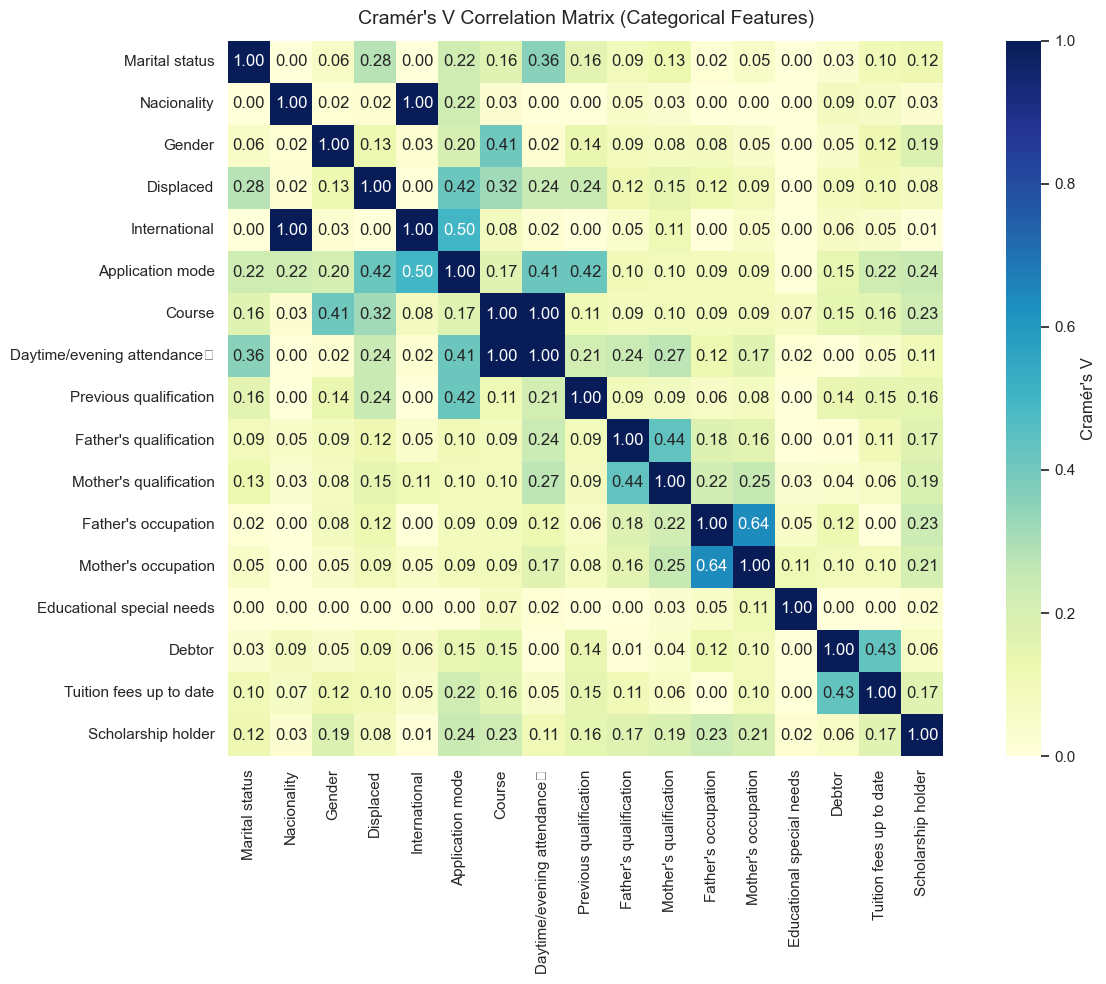

In [20]:
plot_categorical_correlation_matrix(df, categorical_features)

**1. The "Socio-Economic Cluster" (High Association)**

- Mother’s vs. Father’s Qualification/Occupation: There is a very strong association between the parents' education levels and jobs.

- Implication: This confirms Assortative Mating (people tend to marry partners with similar education). For the model, this means we have redundant information. If a student's mother has a PhD, the father likely does too. We might only need one of these features to capture the family's socio-economic status.

**2. The "Demographic Pathway" Link**

- Application Mode vs. Previous Qualification: Strong correlation.

- Implication: The way a student enters university is tightly linked to their background. For example, "International Student" mode links to specific foreign qualifications, while "Over 23" mode links to older, non-standard qualifications. This defines distinct student archetypes.



**3. The "Financial-Outcome" Link**

- Target vs. Tuition Fees Up to Date: Strong association.

- Implication: As seen in other analyses, this is the strongest categorical link to the Target. It confirms that financial compliance is a near-perfect proxy for retention.

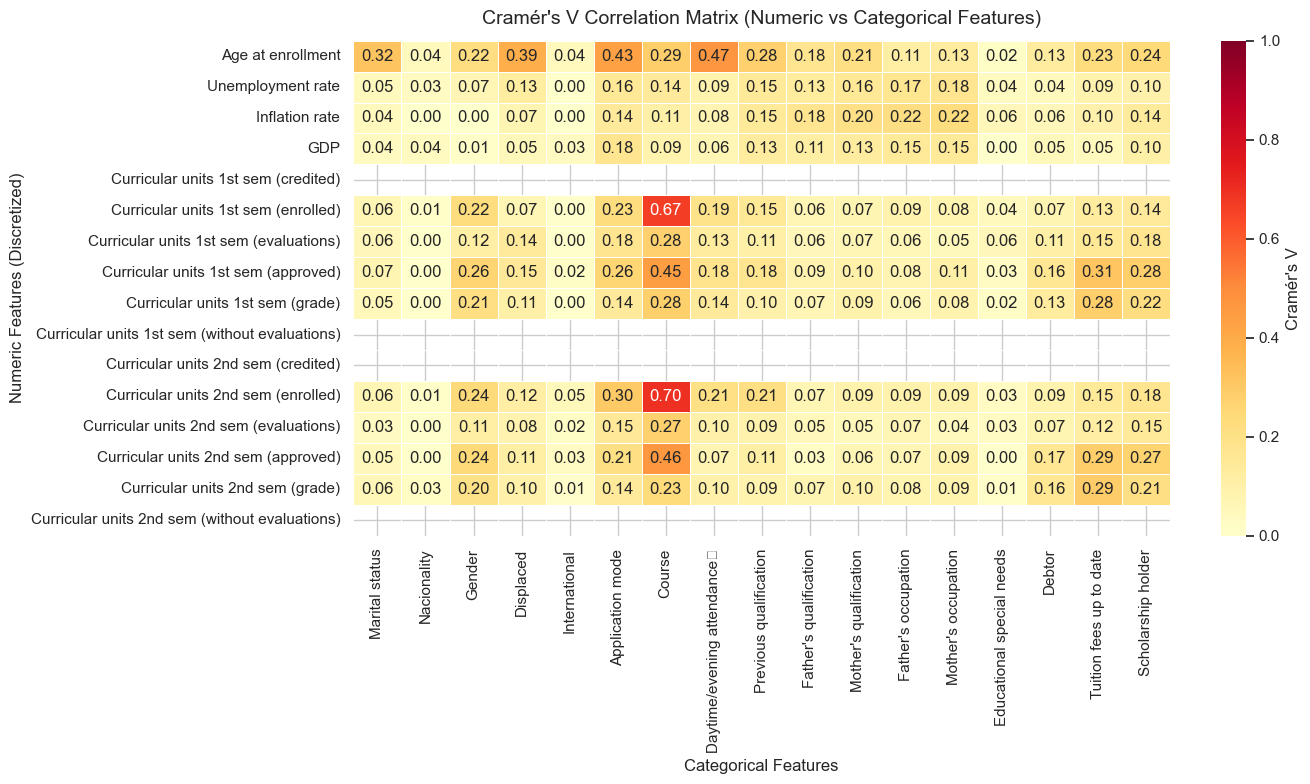

In [21]:
plot_numeric_categorical_correlation_matrix(df, numeric_features, categorical_features)

**1. Implication of course choice** 

- Course shows strong associations with academic workload variables in both semesters, particularly enrolled, evaluations, and approved units (highest Cramér’s V values in the matrix).

- Implication: Differences in academic workload and progression are largely determined by the structure of each course.

**2. Time of the classes**

- Daytime/Evening attendance presents strong associations with the same academic variables across both semesters, forming a clear structural block with Course.

**3. Enrollment pathway**

- Application mode shows a strong association with Age at enrollment, indicating distinct enrollment pathways linked to student age profiles: Different admission routes correspond to different student cohorts entering higher education.

<a id="data-summarization-and-reduction"></a>
#### **Data Summarization and Reduction**


Techniques to visualize and summarize high-dimensional data by projecting it into lower-dimensional spaces.

**PCA and t-SNE (UMAP)** - represent the data in a reduced dimension to better understand and visualize data structures

Explained variance by PC1: 33.11%
Explained variance by PC2: 12.52%
Total variance explained by 2 components: 45.63%


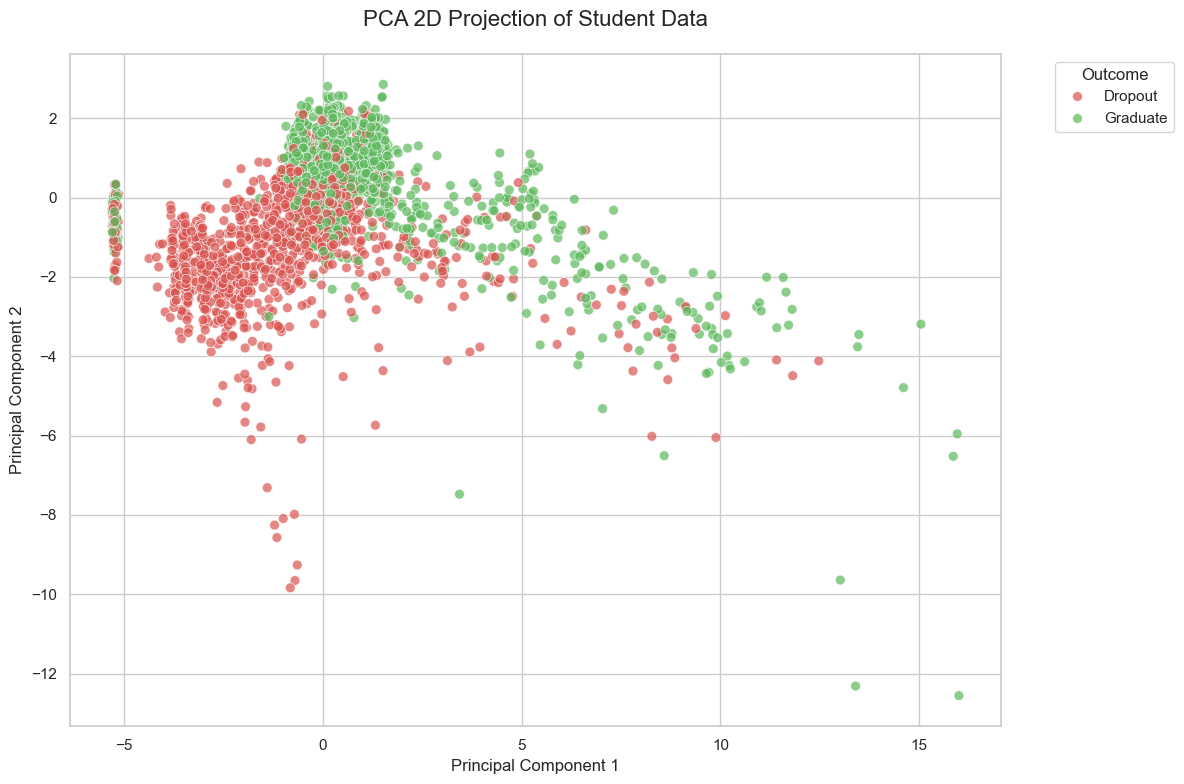

In [22]:
plot_pca_projection(df, categorical_features, target_col='Target')


**PCA (Principal Component Analysis)** was used to reduce the dimensionality of the numerical data, projecting it into two dimensions (PC1 and PC2). The two principal components explain a significant part of the total variance in the data.

**Observations:**
- The scatter plot shows students based on their outcomes ('Dropout' or 'Graduate').
- Although there is no perfectly linear separation between the two classes, we can observe some trends. 'Graduate' (green) and 'Dropout' (red) students form clusters that overlap considerably, suggesting that linear features alone are not sufficient for a clear distinction.
- The overlap indicates that the profiles of students who drop out and those who graduate are complex and share many similarities when analyzed through a linear projection.

--- Running t-SNE ---


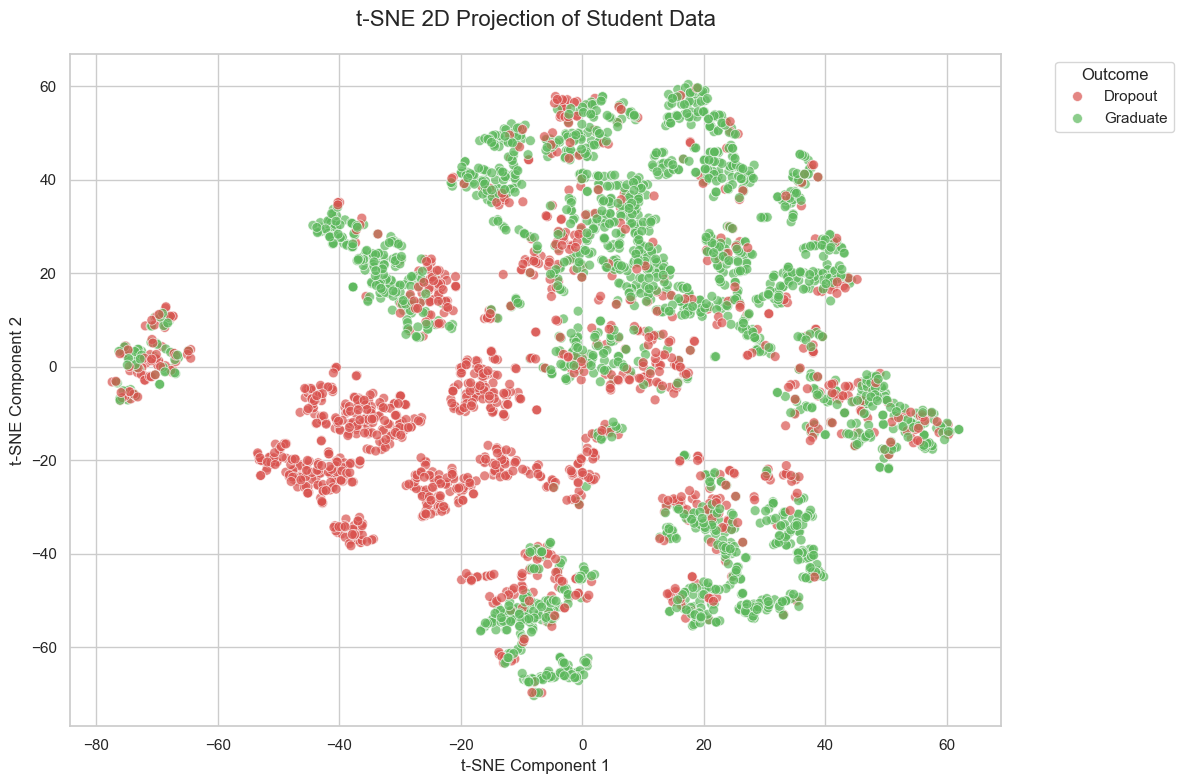

In [23]:
plot_tsne_projection(df, categorical_features, target_col='Target')

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** was used to visualize the data structure in two dimensions, focusing on preserving local neighborhood relationships.

**Observations:**
- t-SNE reveals a clearer separation between the 'Dropout' and 'Graduate' clusters compared to PCA. This suggests that while the groups are not linearly separable, there are non-linear patterns that distinguish the two outcomes.
- The 'Graduate' student cluster (in green) is more dense and cohesive, indicating that these students share more homogeneous profiles.
- The 'Dropout' student cluster (in red) is more dispersed, which may mean that the reasons for dropping out are more varied and heterogeneous.
- The existence of sub-clusters within the 'Dropout' group may indicate different profiles or causes of school dropout, which could be explored in greater detail.

<a id="in-modeling-explanations"></a>
## **In-modeling Explanations**


In [ ]:
from utils.in_modeling_utils import *

In Pre-modeling explanations, we uncovered key pre-modeling insights using exploratory analysis and dimensionality reduction:

- **PCA** showed  partial linear patterns distinguishing dropouts from graduates (~39% variance).
- **t-SNE** revealed stronger non-linear structure and distinct clusters of dropouts.
- Certain features (e.g., nationality, gender, curricular units) show strong imbalance and potential predictive power.

Our goal in Task 2 is to train transparent ("glass-box") models that can:

- Achieve meaningful prediction accuracy on this multiclass task (Dropout, Enrolled, Graduate).
- Provide **human-interpretable explanations** of global feature importance and local decisions.

We’ll begin with:
- **Decision Tree Classifier**: simple, transparent, and easy to visualize.
- **Explainable Boosting Machine (EBM)**: an additive model that captures non-linear effects while maintaining interpretability.

In [25]:
# Target mapping encoding
target_mapping = {'Dropout': 0, 'Graduate': 1}
df['Target'] = df['Target'].map(target_mapping)
# Train-test split
X_train, X_test, y_train, y_test = split_data(df, target_col='Target', test_size=0.2, random_state=42)

<a id="decision-tree-classifier"></a>
#### **Decision Tree Classifier**


Our dataset includes categorical (e.g., gender) and non-linear relationships (as seen in t-SNE). So we need models that can handle these patterns without becoming black boxes.

We begin with a Decision Tree classifier limited to depth 3 to establish a **baseline**  for both interpretability and predictive performance.

Why depth 3? A shallow tree allows us to:

- Identify the most influential features early in the decision process.

- Maintain clear visual interpretability, which aligns with the goals of explainable AI (XAI).

- Provide a readable explanation path that humans (e.g., education stakeholders) can follow.

This serves as our starting point to explore how tree depth influences the **balance between model accuracy and explanatory clarity.**

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       284
           1       0.88      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



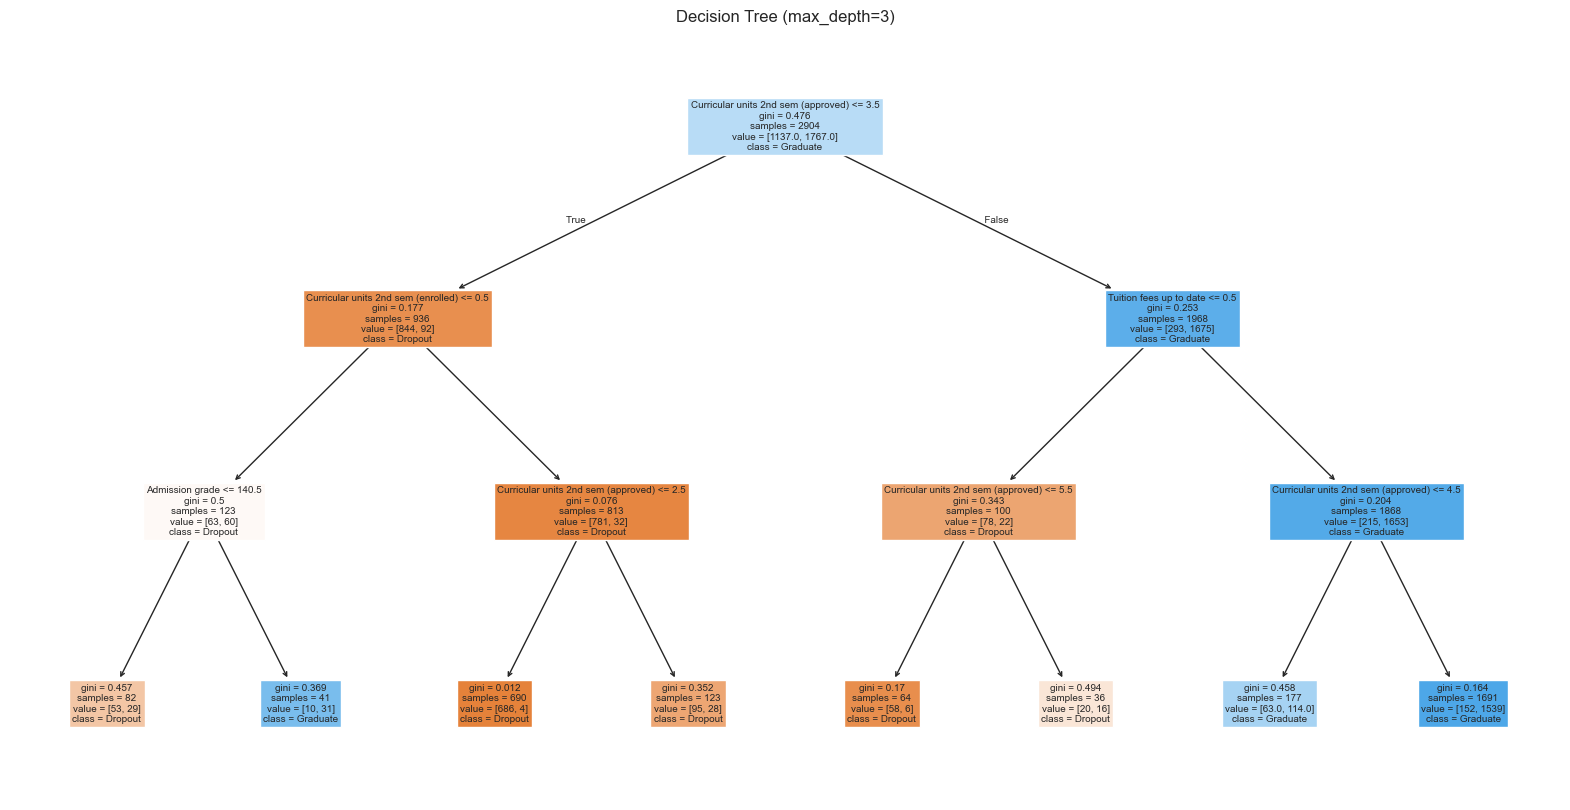

DecisionTreeClassifier(max_depth=3, random_state=42)

In [26]:
decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth=3, random_state=42)

**Results and Interpretability - Depth 3**

Accuracy: ~ 0.90 — the model shows strong overall predictive performance.

Class-wise Performance:

- Dropouts: High precision (0.92) and solid recall (0.78) indicate the model effectively identifies most students at risk.

- Graduates: Excellent recall (0.96) and balanced precision (0.87), showing strong reliability in detecting successful students.

**Interpretability**:

The tree is shallow and easy to read, with splits driven mainly by academic performance and engagement factors:

- Curricular units approved and enrolled (2nd semester) – strongest determinants of success or dropout.

- Tuition fees up to date – indicates financial stability and academic persistence.

- Previous qualification and admission grades – reflect baseline academic readiness.

*How increasing the depth to 4 will influence the tradeoff between accuracy and interpretability?*

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       284
           1       0.87      0.96      0.91       442

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



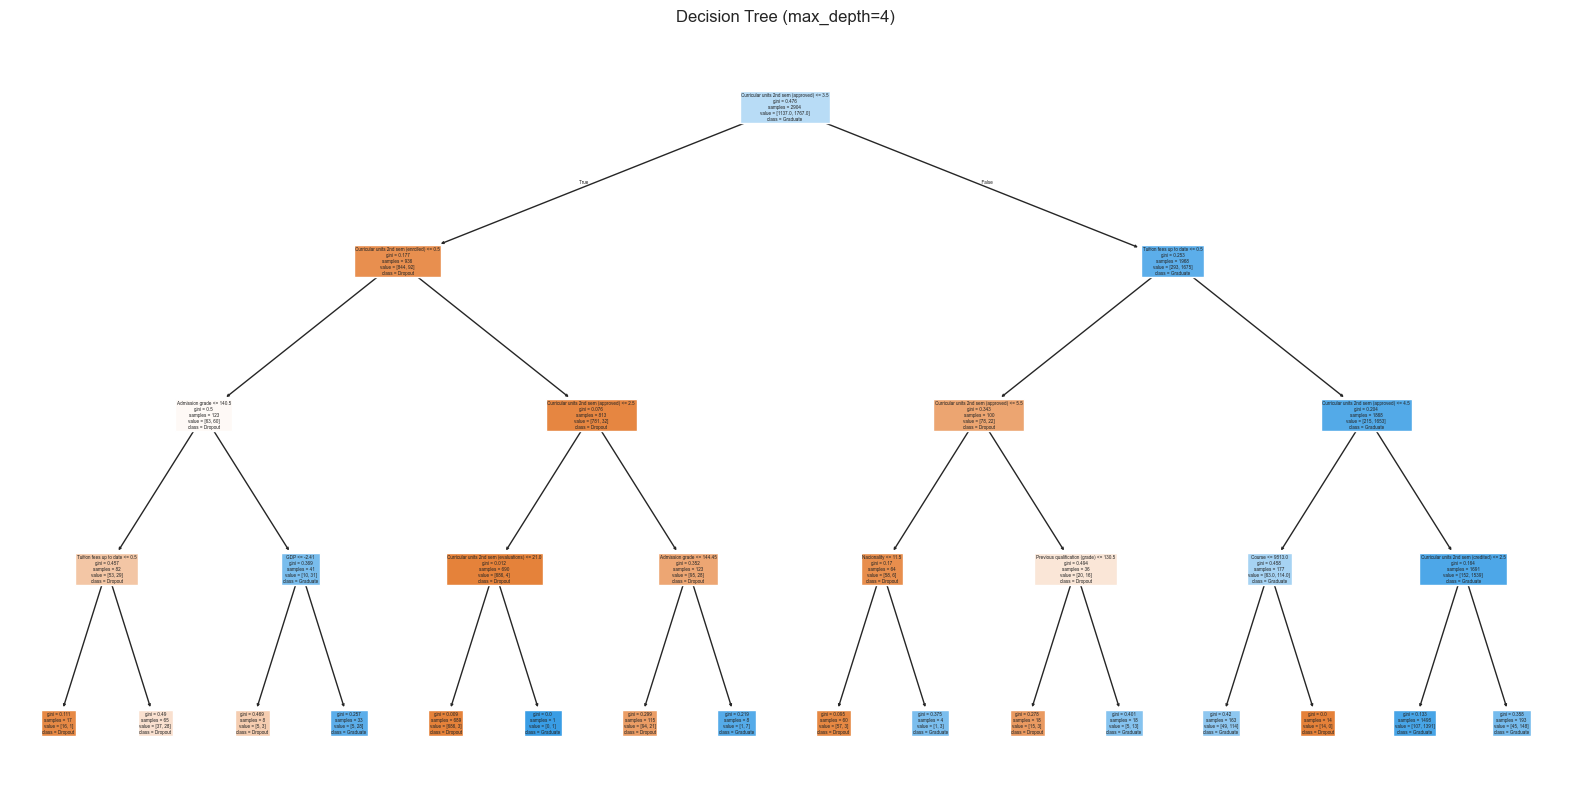

In [27]:
tree_clf = decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth=4, random_state=42)

**Results and Interpretability - Depth 4**

Accuracy: 0.88 — almost unchanged from depth 3, showing the model has reached a performance plateau.

Class-wise performance:

- Dropout: F1 = 0.84 (Precision = 0.91, Recall = 0.78)

- Graduate: F1 = 0.91 (Recall = 0.95)

**Interpretability**:

- The additional layer introduces slightly more detail but increases complexity.

- Core predictors remain the same: Curricular units approved/enrolled (2nd sem), Tuition fees up to date, and Previous qualification grade.

- A few secondary variables appear (e.g., Admission grade, Age), refining boundary cases but making the tree less immediately readable.

**Conclusion**:

Depth 4 improves class balance marginally but offers limited performance gain for a noticeable loss in clarity. The tree remains understandable, yet depth 3 provides a cleaner, nearly equivalent alternative.

**Because it became so hard to intepret the decision tree graphically, we can confirm the conclusions stated above by  exporting the  if–then rules of the DT using export_text() to see exactly how the model decides which students are likely to graduate or drop out.**, and confirm the conclusions above.

In [28]:
from sklearn.tree import export_text
print(export_text(tree_clf, feature_names=list(X_train.columns), max_depth=4))


|--- Curricular units 2nd sem (approved) <= 3.50
|   |--- Curricular units 2nd sem (enrolled) <= 0.50
|   |   |--- Admission grade <= 140.50
|   |   |   |--- Tuition fees up to date <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Tuition fees up to date >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Admission grade >  140.50
|   |   |   |--- GDP <= -2.41
|   |   |   |   |--- class: 0
|   |   |   |--- GDP >  -2.41
|   |   |   |   |--- class: 1
|   |--- Curricular units 2nd sem (enrolled) >  0.50
|   |   |--- Curricular units 2nd sem (approved) <= 2.50
|   |   |   |--- Curricular units 2nd sem (evaluations) <= 21.00
|   |   |   |   |--- class: 0
|   |   |   |--- Curricular units 2nd sem (evaluations) >  21.00
|   |   |   |   |--- class: 1
|   |   |--- Curricular units 2nd sem (approved) >  2.50
|   |   |   |--- Admission grade <= 144.45
|   |   |   |   |--- class: 0
|   |   |   |--- Admission grade >  144.45
|   |   |   |   |--- class: 1
|--- Curricular units 2nd sem (approved

<a id="explainable-boosting-machine"></a>
#### **Explainable Boosting Machine**


While the Decision Tree provided clear, rule-based explanations and solid accuracy, it still has limitations:

- It captures only hierarchical, piecewise-linear relationships — each split is a hard boundary.
- Increasing tree depth improves accuracy but reduces interpretability.
- Some variables (like socioeconomic factors or academic grades) may interact in non-linear or additive ways that a simple tree can’t model effectively.

To address this, we now move to an Explainable Boosting Machine (EBM) — a glass-box model that:

- Extends linear models by learning smooth, non-linear feature effects,
- Automatically captures pairwise interactions when relevant,


**The Decision Tree explains how decisions are made step-by-step. The EBM explains why each feature contributes to the prediction — giving a smoother, more generalizable view of the same problem.**

In [29]:
ebm = explainable_boosting_classifier(X_train, y_train, X_test, y_test)


Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       284
           1       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [30]:
# Global explanation: shows each feature’s contribution strength
ebm_global = ebm.explain_global()
show(ebm_global)


<!-- http://127.0.0.1:7001/13091710992/ -->

<a id="Post-Hoc-XAI-Techniques"></a>
## **Post-modeling Explanations**

<a id="black-box-training"></a>
### **Black Box Model Training**

In [ ]:
from utils.post_modeling_utils import *

Helper function 'match_dtypes' defined.


**Why XGBoost?**

We selected **XGBoost** as our "black-box" model because it is widely considered  for tabular data. It uses an ensemble of gradient-boosted decision trees to capture complex, non-linear relationships and high-order interactions between features.

While XGBoost typically provides superior predictive performance compared to simple Decision Trees or EBMs, it lacks intrinsic interpretability. We cannot easily trace the decision path for a specific student. This trade-off makes it an ideal candidate to demonstrate the value of **Post-Hoc XAI techniques**—methods that help us explain complex models after they are trained.

In [32]:
xgb_model = train_xgb_pipeline(X_train, X_test, y_train, y_test)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726


=== Confusion Matrix ===
[[232  52]
 [ 13 429]]

Artifacts saved to folder: src/xgb_model


**Model Performance Analysis**

The XGBoost model demonstrates robust performance on the test set. By leveraging boosting, it effectively minimizes errors that simpler models might miss.
- **High Accuracy/F1-Score:** Indicates the model effectively distinguishes between students likely to dropout and those who will graduate.
- **Black Box Nature:** Despite these good results, the model gives us no immediate insight into *why* a specific student was classified as "Dropout". To trust and act on these predictions, we need to apply XAI techniques.

<a id="Post-Hoc-XAI-Techniques"></a>
### **Post-Hoc XAI Techniques**

**Post-Hoc XAI techniques** are explanation methods applied *after* a model has been trained. They treat the model as a "black box," analyzing only its inputs and outputs without needing access to its internal weights or structure.

These techniques allow us to have the best of both worlds: the high predictive power of complex algorithms (like XGBoost or Neural Networks) and the transparency required for decision-making in sensitive areas like education.

<a id="simplification-based-techniques"></a>
### **Simplification-Based Techniques (Global Surrogate Models)**



This approach involves training a simple, interpretable model (the **surrogate**) to approximate the predictions of the complex black-box model.

In this project, we use a **Decision Tree** as our surrogate model.
1. We take the predictions generated by XGBoost.
2. We train a Decision Tree to predict *those XGBoost predictions* (not the original ground truth).
3. If the Decision Tree is accurate (high fidelity), we can inspect its rules to understand the global logic that the XGBoost model is using.

In [33]:
surrogate_model = surrogate_model_from_xgb(xgb_model, X_train)

In [34]:
evaluate_surrogate_model(xgb_model, surrogate_model, X_test)


=== Surrogate Model Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       245
           1       0.96      0.96      0.96       481

    accuracy                           0.95       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.95      0.95      0.95       726


=== Surrogate Model Confusion Matrix ===
[[224  21]
 [ 17 464]]

=== R2 Score ===
R² (fidelity) of the surrogate model: 0.7659

=== Agreement Rate ===
Agreement Rate: 0.9476584022038568


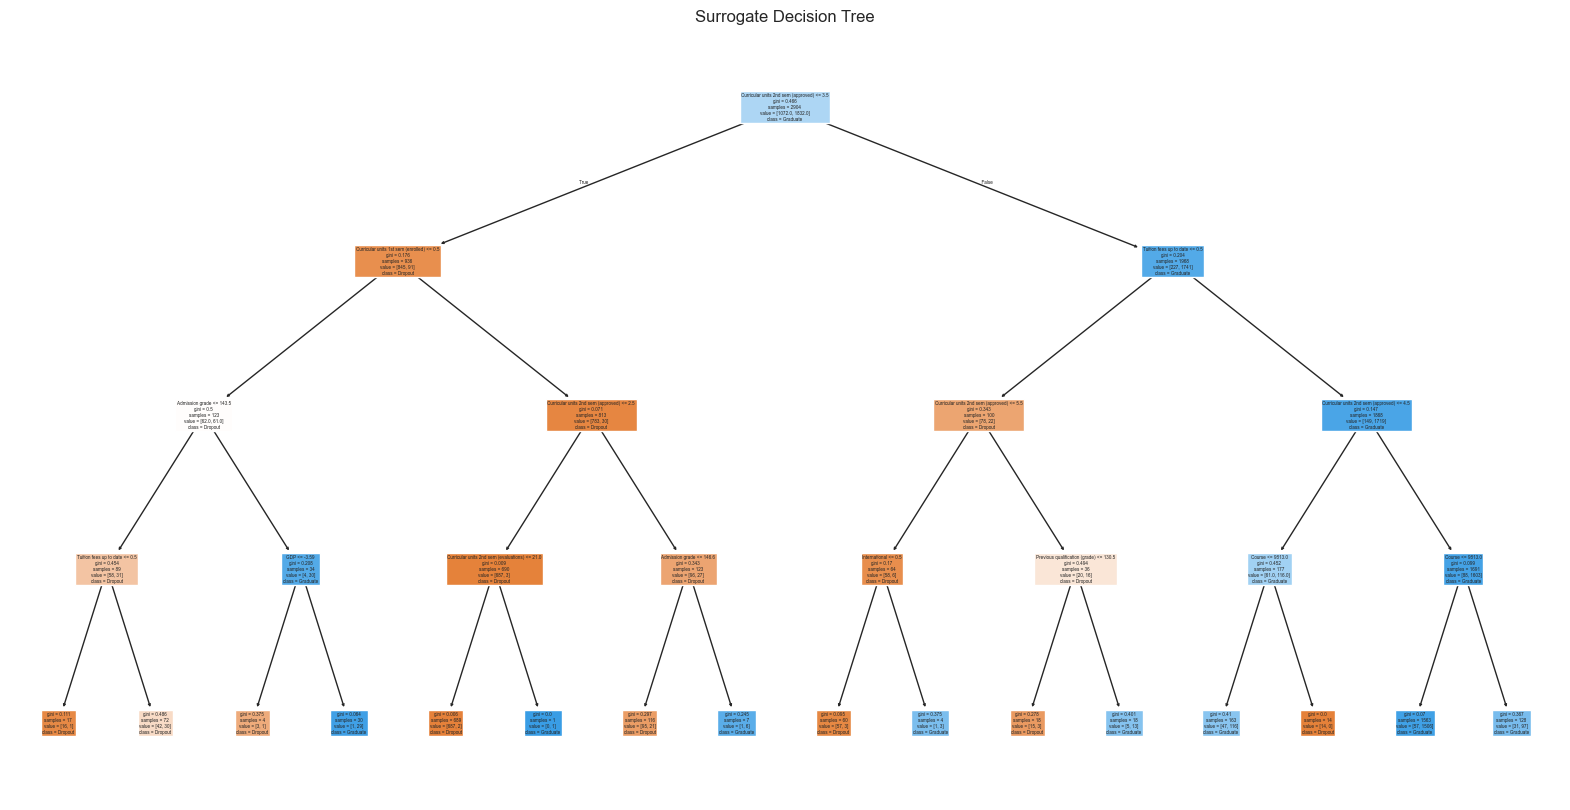

In [35]:
plot_surrogate_tree(surrogate_model, feature_names=X_train.columns)

**Surrogate Model Results**

The evaluation above measures the **Fidelity** of our surrogate Decision Tree—how well it mimics the XGBoost model.

- **High Fidelity Score:** If the accuracy/R² is high, it means the Decision Tree successfully captured the decision boundaries of the XGBoost model. We can trust the rules of this tree as a valid explanation of the complex model.

- **Tree Analysis:** By observing the surrogate tree structure, we can identify the most critical decision paths learned by the XGBoost model:

    - Root Node: The top split is determined by Curricular units 2nd sem (approved) <= 3.5. This confirms that academic performance in the second semester is the most dominant feature. Students with 3.5 or fewer approved units move to the left branch (predominantly "Dropout" territory), while those with more approved units move to the right branch (predominantly "Graduate" territory).

    - Secondary Splits: The tree further refines predictions based on the initial academic split:

    - Left Branch: For students with fewer approved units, the next check is Curricular units 2nd sem (enrolled). This distinguishes between students who barely enrolled in courses versus those who enrolled but failed. Deeper splits here involve Admission grade and Previous qualification (grade).

    - Right Branch: For students with higher academic performance, the immediate next splitter is Tuition fees up to date. This indicates that for students who are passing their classes, financial standing is the next most critical indicator of whether they will graduate or drop out.

    - Leaf Nodes: The final leaves give us the predicted class. We can observe that "Graduate" nodes (blue) are heavily concentrated on the right side of the tree (high approved units and paid tuition), while "Dropout" nodes (orange) are concentrated on the left.

This confirms that despite its complexity, the XGBoost model bases its core decisions on interpretable and logical student characteristics, primarily prioritizing academic performance and financial status.


<a id="feature-based-techniques"></a>

### **Feature Based Techniques**



Feature-Based Techniques focus on quantifying the contribution of each variable (feature) to the model's predictions. Unlike surrogate models that try to replicate the entire model structure, these techniques isolate the impact of variables.

We will explore:
1. **Global Feature Importance**: Which variables are most useful for building the XGBoost trees.
2. **Accumulated Local Effects (ALE)**: How the probability of success changes as we vary the value of a specific feature. Note: We selected ALE over Partial Dependence Plots (PDP) to correctly handle the high correlations between academic semesters.
3. **SHAP (SHapley Additive exPlanations)**: A unified approach that explains individual and global predictions based on game theory.

<a id="global-feature-importance"></a>
#### Global Feature Importance

In [36]:
feature_importance_df = feature_importance(xgb_model, X_train.columns)

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.260467
16                         Tuition fees up to date    0.095612
24             Curricular units 1st sem (approved)    0.060762
22             Curricular units 1st sem (enrolled)    0.054261
28             Curricular units 2nd sem (enrolled)    0.031514
31                Curricular units 2nd sem (grade)    0.027323
20                                   International    0.026671
15                                          Debtor    0.026416
27             Curricular units 2nd sem (credited)    0.024243
3                                           Course    0.023144
26  Curricular units 1st sem (without evaluations)    0.022645
17                                          Gender    0.021277
18                              Scholarship holder    0.020296
29          Curricular units 2nd sem (evaluations)    0.019344
1                                 Application mode    0

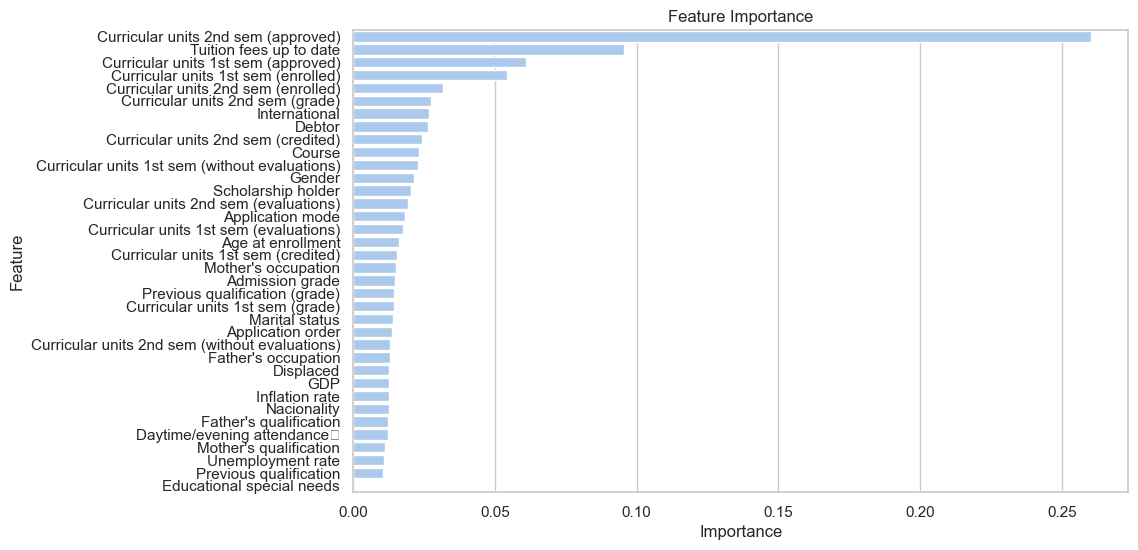

In [37]:
plot_feature_importance(feature_importance_df)

**Feature Importance Analysis**

The bar chart above shows the features that contributed most to impurity reduction (information gain) during XGBoost training.

*   **Academic Dominance**: Variables related to 2nd-semester performance (`Curricular units 2nd sem (approved)`, `grade`) are distinctly the most important. This confirms that recent success is the best predictor of the future.
*   **Financial Factor**: `Tuition fees up to date` appears as a top variable, indicating that financial regularity is a strong indicator of continuity.
*   **Comparison**: Interestingly, demographic or macroeconomic factors have much less weight compared to immediate academic performance.

In [38]:
print(type(xgb_model))
print(np.unique(y_train, return_counts=True))


<class 'xgboost.sklearn.XGBClassifier'>
(array([0, 1]), array([1137, 1767]))


#### PDP Plots

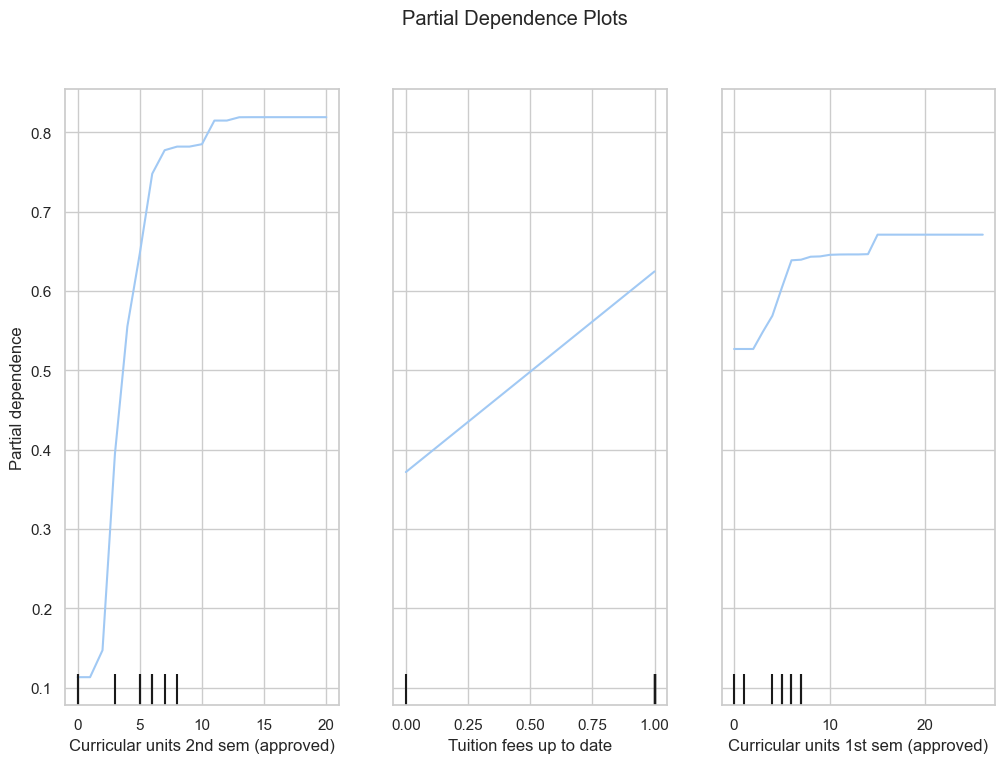

In [39]:
features_to_plot = [30, 16, 24]

plot_pdp(xgb_model, X_train, features_to_plot)

We initially employed Partial Dependence Plots (PDP) as a standard method to visualize global feature impacts. 

However, these plots proved unsuitable due to the strong correlation between academic features (e.g., 1st vs. 2nd-semester units), which violates the PDP **assumption of independence.** This correlation forces the model to evaluate unrealistic scenarios—such as a **student failing the first semester but acing the second—leading to extrapolation errors in the plots above**. Consequently, we discard these results in favor of Accumulated Local Effects (ALE) plots, which provide a valid interpretation by respecting the conditional distribution of the data.

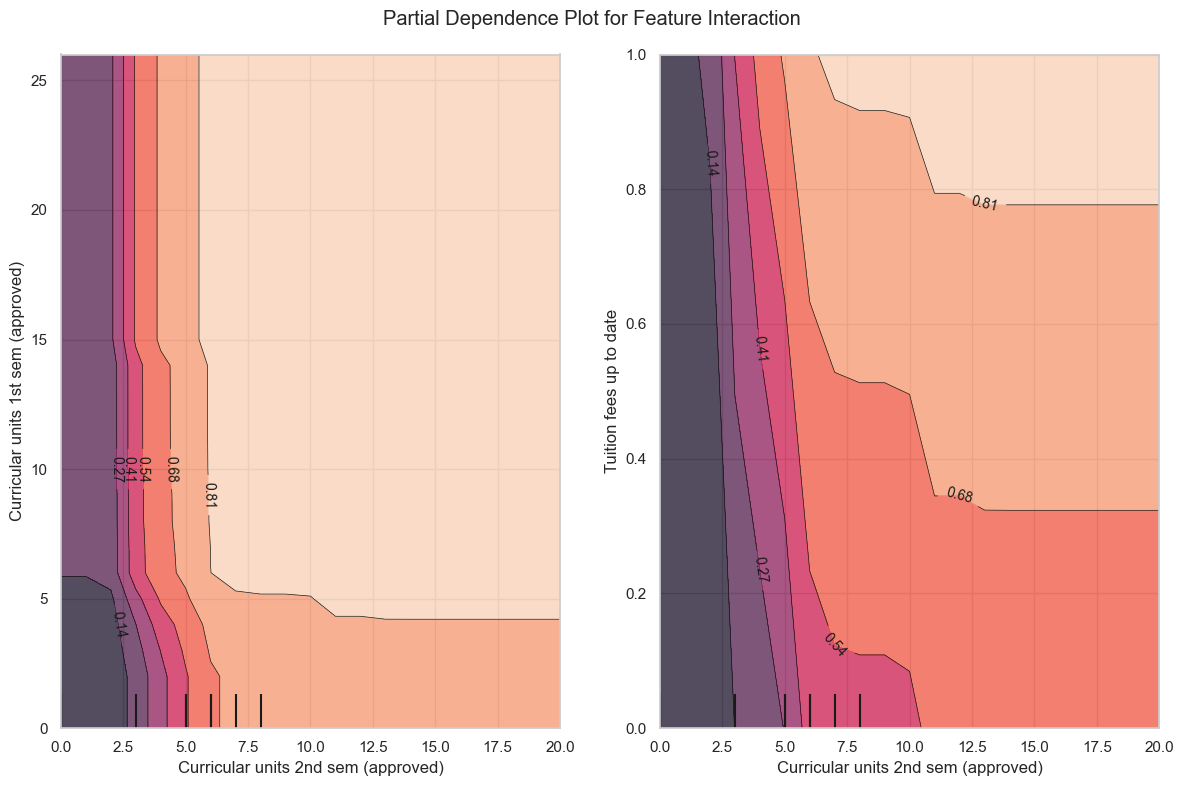

In [40]:
selected_features = [(30, 24), (30, 16)]

plot_pdp_interaction(xgb_model, X_train, selected_features)

The 2D Partial Dependence Plots displayed above further illustrate the risks of extrapolation. In the left plot (1st vs. 2nd Semester), the algorithm calculates predictions for the entire grid, including the bottom-right region (High 2nd Sem performance / Low 1st Sem performance). Since this combination is practically impossible due to prerequisites, the model is extrapolating in a data-sparse region. 

Therefore, the interaction effects displayed in these heatmaps are unreliable and likely distorted by the strong correlation between the two semesters.

<a id="ale-plots"></a>
#### ALE Plots

**So, We switched to Accumulated Local Effects (ALE) because it solves the correlation problem. Instead of averaging over a global grid, ALE calculates feature effects locally—only comparing students who already have similar characteristics.**

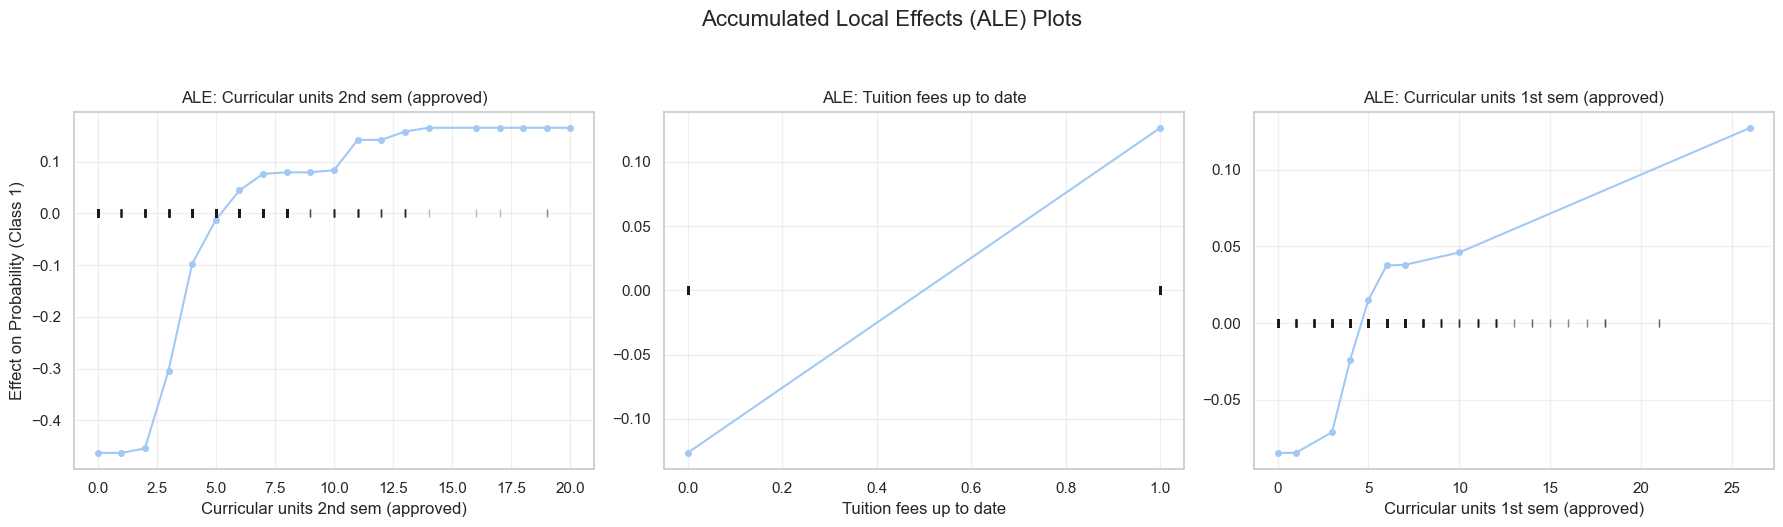

In [41]:

features_to_plot = [
    'Curricular units 2nd sem (approved)', 
    'Tuition fees up to date', 
    'Curricular units 1st sem (approved)'
]

# Run the function
plot_ale(xgb_model, X_train, features_to_plot)

The ALE analysis clarifies the model's priorities: Tuition status acts as an initial gatekeeper (financial/engagement check), while 2nd Semester Performance is the primary academic driver. The 1st Semester is demoted in importance compared to PDPs, revealing that it serves mostly as a foundation for the 2nd semester rather than an independent predictor of final dropout risk.

<a id="shapley-additive-explanations"></a>
#### **SHAP (SHapley Additive exPlanations)**



SHAP is an advanced technique based on Game Theory. It assigns an importance value to each feature for *each individual prediction*.

*   **Positive SHAP Value**: The feature pushes the prediction towards the "Graduate" class.
*   **Negative SHAP Value**: The feature pushes the prediction towards the "Dropout" class.

The sum of the SHAP values of all features (+ the base value) results exactly in the probability predicted by the model. This property makes SHAP extremely reliable for explaining individual decisions.

In [42]:
shap_values, explainer = apply_shap(xgb_model, X_train)

In [43]:
print(shap_values.shape)

(2904, 36)


In [44]:
indices_graduated = y_train[y_train == 1].index
indices_dropout = y_train[y_train == 0].index


graduated_index = indices_graduated[0]
dropout_index = indices_dropout[0]

print(f"Graduated student index: {graduated_index}")
print(f"Dropout student index: {dropout_index}")


Graduated student index: 291
Dropout student index: 968


##### SHAP values for a Graduated Student

Marital status                                       1.000000
Application mode                                    44.000000
Application order                                    1.000000
Course                                            9003.000000
Daytime/evening attendance\t                         1.000000
Previous qualification                              39.000000
Previous qualification (grade)                     150.000000
Nacionality                                          1.000000
Mother's qualification                              19.000000
Father's qualification                              37.000000
Mother's occupation                                  6.000000
Father's occupation                                  6.000000
Admission grade                                    150.000000
Displaced                                            0.000000
Educational special needs                            0.000000
Debtor                                               1.000000
Tuition 

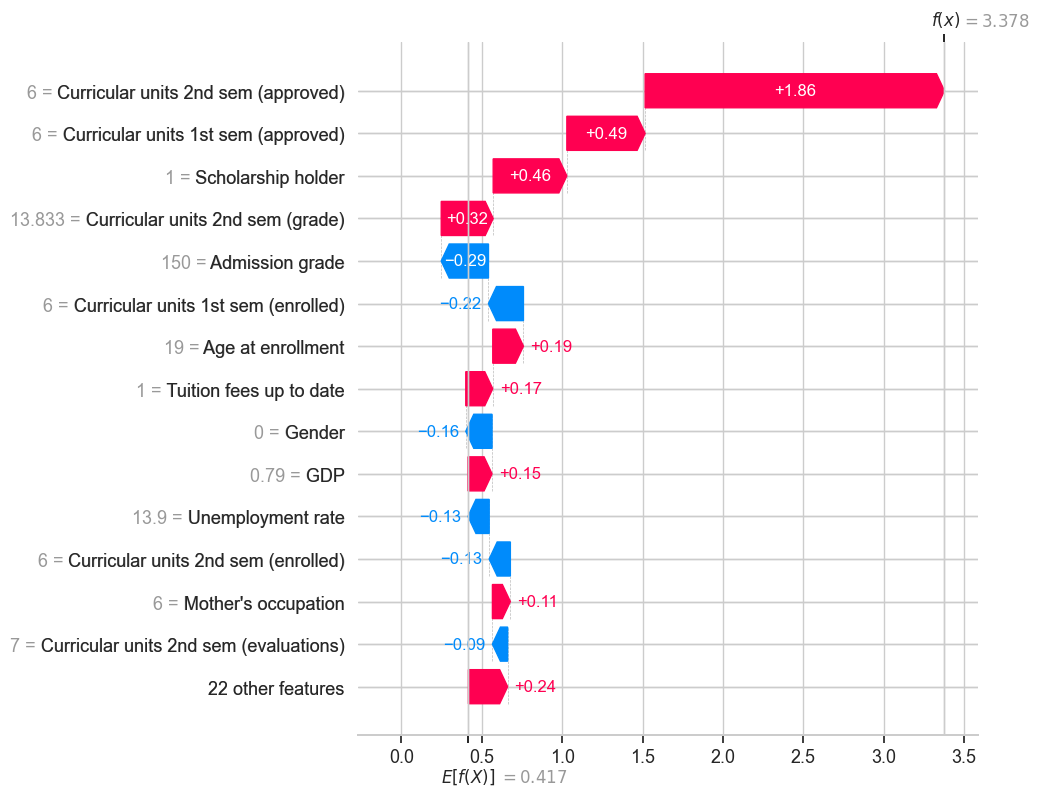

In [45]:
# SHAP values for a Graduated Student
instance_index = 291

plot_shap_instance(shap_values, explainer, X_train, y_train, instance_index)

##### SHAP values for a Dropout Student

Marital status                                       2.00
Application mode                                    39.00
Application order                                    1.00
Course                                            9991.00
Daytime/evening attendance\t                         0.00
Previous qualification                               1.00
Previous qualification (grade)                     135.00
Nacionality                                          1.00
Mother's qualification                              34.00
Father's qualification                              34.00
Mother's occupation                                  0.00
Father's occupation                                  0.00
Admission grade                                    134.10
Displaced                                            1.00
Educational special needs                            0.00
Debtor                                               0.00
Tuition fees up to date                              0.00
Gender        

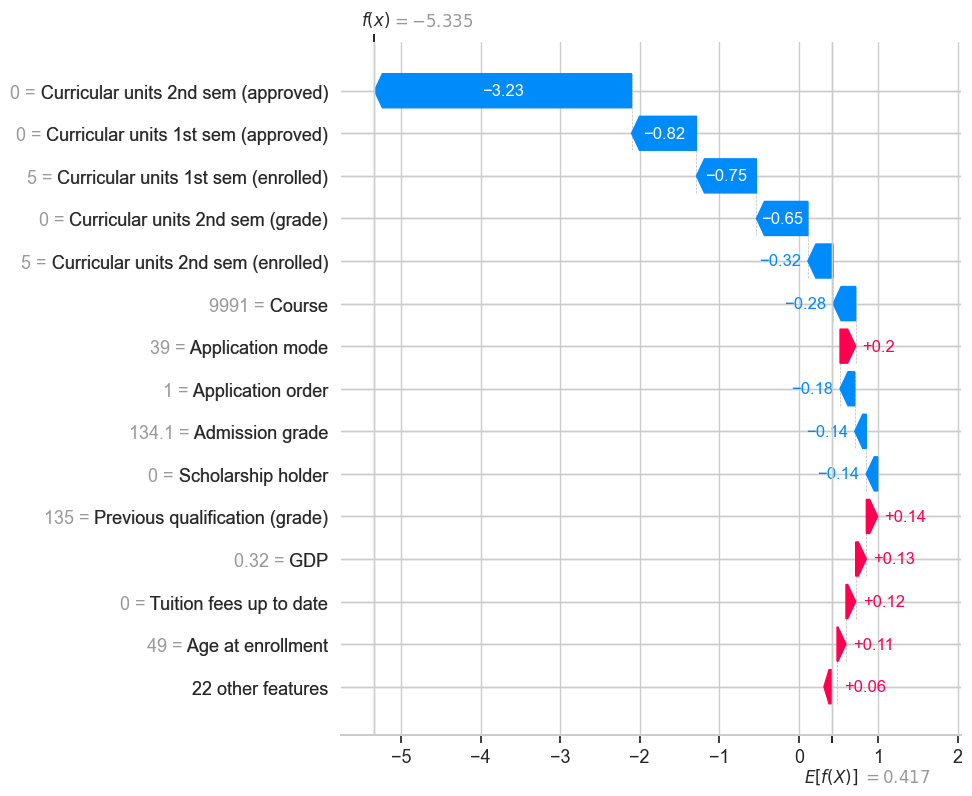

In [46]:
# SHAP values for a Dropout Student
instance_index = 968

plot_shap_instance(shap_values, explainer, X_train,y_train, instance_index)

**Local Analysis: Graduate vs Dropout**

The 'Waterfall' plots above dissect the model's decision for two specific students:

1.  **Graduated Student**:
    *   The chart shows how we start from the average probability (E[f(x)]) and reach the high final prediction.
    *   **Red bars (positive)** indicate success factors. We can see `Curricular units 2nd sem (approved)` with a high value.

2.  **Dropout Student**:
    *   Here we see the opposite. **Blue bars (negative)** dominate, pushing the probability down.
    *   Factors like few approved units, overdue tuition fees, or debts (`Debtor`) are often the main culprits leading the model to predict dropout.

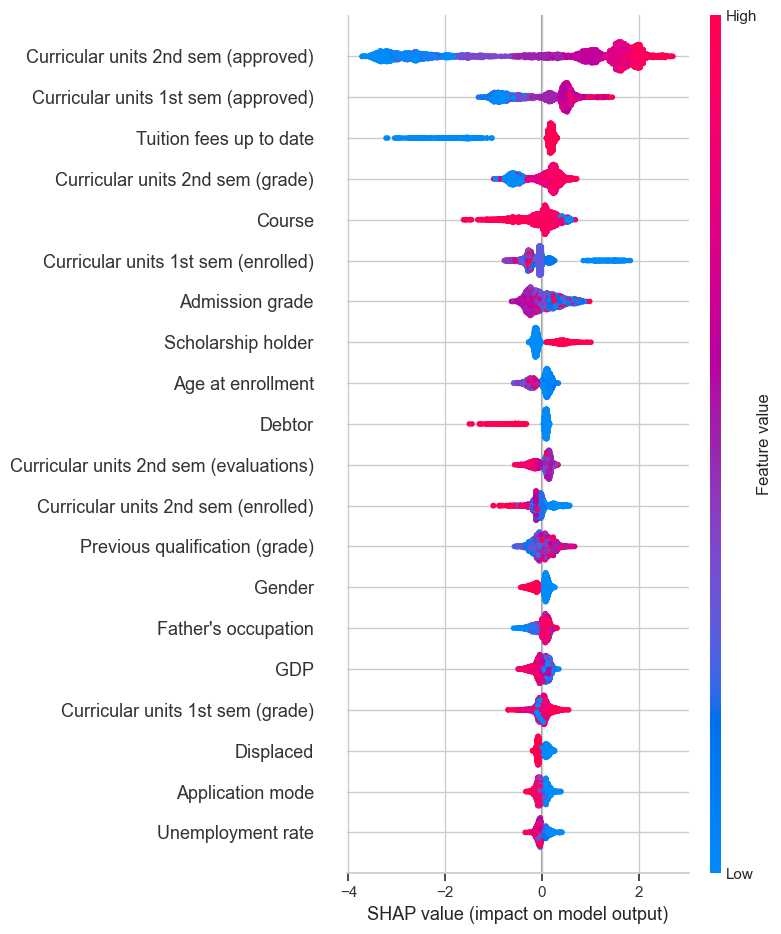

In [47]:
shap.summary_plot(shap_values, X_train)

**Global Analysis with SHAP Summary Plot**

This 'Beeswarm plot' is one of the richest visualizations in XAI, combining feature importance with its directional effect.



**Key Insights:**

1.  **Curricular units 2nd sem (approved)**:
    *   **Red** points (many approved units) are strongly on the **Positive** side (right) -> Increase chance of graduating.
    *   **Blue** points (few units) are on the **Negative** side (left) -> Drastically increase dropout risk.

2.  **Tuition fees up to date**:
    *   **Blue** points (value 0 = not paid) have a strong **Negative** impact. Not paying tuition is a very strong risk signal for the model.
    *   **Red** points (paid) have a positive impact, but more moderate.

3.  **Dispersion and Tails**:
    *   Features with large horizontal dispersion (like curricular units) have very high discriminative power.
    *   We can see that for some**Global Analysis with SHAP Summary Plot**
.

**Critical Analysis: consistency with EDA**

Our model's top predictors align perfectly with the hypotheses generated during our Exploratory Data Analysis:

- **Tuition Fees (The Financial Proxy)**: In our EDA, we noted a sharp split between students who pay on time and those who don't. SHAP confirms this is the dominant feature, validating that financial stability is the primary driver of retention.

- **Academic Momentum**: The EDA showed a correlation of 0.8 between 1st and 2nd-semester grades. The model distributes importance between them, but heavily penalizes students who fail to gain momentum in the 1st semester.

- **The "Age" Factor**: We observed a right skew in age during EDA. The SHAP plots reveal that being an "older" student (Age > 25) acts as a consistent negative force on the probability of graduation, likely capturing the "non-traditional student" risks (work/family balance) we hypothesized earlier.

<a id="example-based-techniques"></a>
### **Example-Based Techniques**

**Example-Based Techniques** explain model behavior by selecting specific instances (examples) from the dataset rather than summarizing features. They answer questions like "Which other students are similar to this one?" or "What conditions must hold for this prediction to remain valid?".

In this section, we use **Anchors**, a technique that provides high-precision rules (if-then conditions) to explain individual predictions.

<a id="anchors"></a>
#### Anchors

In [69]:
explanation = apply_anchor(xgb_model, X_train, X_test)

Explaining instance 0...

=== Anchor Explanation for instance 0 ===
Anchor: ['Curricular units 2nd sem (approved) > 6.00', 'Curricular units 1st sem (approved) > 3.00', 'Curricular units 1st sem (evaluations) <= 10.00']
Precision: 0.96
Coverage: 0.14


**Anchor Explanation Analysis**

The output above reveals a highly robust rule (Anchor) that explains the model's prediction for this student.

*   **The Anchor Rule**: The model guarantees this prediction if the following three conditions are met simultaneously:
    1.  `Curricular units 2nd sem (approved) > 6.00`: The student passed more than 6 units in the 2nd semester (very high performance).
    2.  `Curricular units 1st sem (approved) > 3.00`: The student passed more than 3 units in the 1st semester.
    3.  `Curricular units 1st sem (evaluations) <= 10.00`: The student did not require an excessive number of evaluations (exams/resits) in the 1st semester.

*   **Precision (0.96)**: This is the "trustworthiness" of the rule. In **96%** of the cases where a student meets these exact academic criteria, the model predicts the same outcome (likely "Graduate"). This means the rule is extremely reliable.

*   **Coverage (0.14)** (Moderate Generality):This specific rule applies to 14% of the entire student population in our dataset.  While 14% might sound low, in a complex dataset with many features, this is actually a significant cluster. It suggests that this "High Performance" profile is a common archetype. The rule is not just describing a single outlier (which would have coverage near 0.01) but a substantial portion of the student body.

**Conclusion**:
Unlike SHAP, which gives us feature weights, this Anchor gives us a **sufficient condition**. We can tell a stakeholder: *"Regardless of tuition fees, age, or demographics, if a student passes >6 units in the 2nd semester and maintains decent 1st-semester performance, they are almost guaranteed to graduate according to this model."*

<a id="counterfactual-explanations"></a>
#### Counterfactual Explanations

In [49]:
import dice_ml
from RobustXGModel import RobustXGBModel

##### The DiCE Framework

To provide actionable feedback to students and tutors, we use Diverse Counterfactual Explanations (DiCE). Unlike feature importance (SHAP), which tells us which features matter, DiCE tells us how to change them to achieve a desired outcome.



In [50]:
vars = [
    # Macroeconomic
    'Unemployment rate', 'Inflation rate', 'GDP',
    
    # Demographics / History (Numeric)
    'Age at enrollment', 
    'Admission grade', 
    'Previous qualification (grade)', 
    'Application order',
    
    # 1st Semester Numeric Features
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (without evaluations)',

    # 2nd Semester Numeric Features
    'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (without evaluations)'
]

In [51]:
d = dice_ml.Data(dataframe=df, continuous_features=vars, outcome_name='Target')

# Initialize DiCE Model using the ROBUST WRAPPER
robust_model = RobustXGBModel(xgb_model)
m = dice_ml.Model(model=robust_model, backend="sklearn")

# Initialize Explainer
exp = dice_ml.Dice(d, m, method="random")
print("DiCE Explainer re-initialized with Robust Wrapper (P2 Fix Applied).")

DiCE Explainer re-initialized with Robust Wrapper (P2 Fix Applied).


**The problem :** DiCE is mathematically smart but can´t really understand context. DICE searchs for the shortest path to change a prediction, ignoring real-world rules (e.g., "you can't change the past" or "students can't self-issue scholarships").

    To fix this, we stop treating all features equally. We create "Personas"—distinct sets of rules that force the model to look for solutions only within the specific "powers" of the person asking the question

##### The Two Personas (Constraint Sets)

| **Persona**                                       | **Who is Asking?**        | **The Question (Goal)**                                           | **What CAN Change? (Actionable Features)**                 | **What is LOCKED? (Immutable Constraints)**                    |
| ------------------------------------------------- | ------------------------- | ----------------------------------------------------------------- | ---------------------------------------------------------- | -------------------------------------------------------------- |
| **P1: The Student (The “Effort” View)**           | The Student               | “What can I do next semester to save my degree?”                  | Future Performance (2nd Sem Grades, Exams)                 | Financials & History (Tuition, Scholarship, 1st Sem Grades)    |
| **P2: The Institution (The “Support” View)**      | Financial Officer / Admin | “Can we save this student purely through administrative support?” | Financial/Admin Status (Tuition Fees, Scholarship, Debtor) | Academic Grades (The school cannot take tests for the student) |


##### Configuration of Persona-Based Constraint

As stated above, we will be defyning the 2 personas.

* **P1: The Student:** Can only change **future** academic performance (2nd Semester). Financials and history are locked.


In [52]:
# Persona 1: The Student (Actionable Effort)
# Constraints: Can only change 2nd sem outcomes.
features_student = [
    'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (without evaluations)'
]



* **P2: The Institution:** Can only change **administrative/financial** status. Grades are locked.


In [53]:
# Persona 2: The Institution (Financial Support)
# Constraints: Can only change financial/admin status.
features_institution = [
    'Tuition fees up to date', 
    'Scholarship holder', 
    'Debtor'
]

In [54]:
# Target Class: 1 = Graduate
desired_class = 1

##### Case Study A: The "Financial Cliff"

* **Profile:** Good grades, but financial debt.
* **Prediction:** Dropout.
* **Goal:** Compare if the student needs to study harder (P1) or needs financial aid (P2).

-> We define **financial risk** as ('Debtor' == 1 && 'Tuition fees up to data' == 0)

-> We define **Academic Sucess** as ('Curricular units 1st sem (approved)' >= 4 && 'Curricular units 1st sem (grade)'>= 11)

In [55]:
query_instance_A = select_dropout_candidate(
    X_test=X_test,
    model=xgb_model,
    df_reference=df
)


Candidates found: 46

Selected Student #4085 (Predicted Dropout)

--- Student Profile (Fixed Types) ---
      Tuition fees up to date  Debtor  Marital status  \
4085                        0       1               1   

      Curricular units 1st sem (grade)  
4085                              12.0  


In [56]:
print(f"Analyzing Student #{query_instance_A.index[0]}...")
print(f"Current Prediction: {'Dropout' if xgb_model.predict(query_instance_A)[0] == 0 else 'Graduate'}")

# --- Persona P1: The Student ---
print("\n[P1] Student View: 'Can I study my way out of this?'")

try:
    dice_exp_A1 = exp.generate_counterfactuals(query_instance_A, total_CFs=3, desired_class=desired_class,features_to_vary=features_student,
        permitted_range={
            'Curricular units 2nd sem (grade)': [10, 20],
            'Curricular units 2nd sem (approved)': [0, 8]
        }
    )

    result_p1 = dice_exp_A1.cf_examples_list[0].final_cfs_df
    
    pretty_print_cfs(cf_df=result_p1,features_varied=features_student,label="P1",model=xgb_model,original_instance=query_instance_A
    )

except Exception as e:
    print("[P1] INSIGHT: The student is 'Study-Blocked'.")
    print("Even with perfect grades, the risk remains too high.")




Analyzing Student #4085...
Current Prediction: Dropout

[P1] Student View: 'Can I study my way out of this?'


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
[P1] INSIGHT: The student is 'Study-Blocked'.
Even with perfect grades, the risk remains too high.


In [57]:
# --- Persona P2: The Institution ---
print("\n[P2] Institution View: 'Can financial aid save them?'")

try:
    dice_exp_A2 = exp.generate_counterfactuals( query_instance_A,  total_CFs=3, desired_class=desired_class,
                                                features_to_vary=features_institution
    )

    result_p2 = dice_exp_A2.cf_examples_list[0].final_cfs_df

    pretty_print_cfs( cf_df=result_p2,features_varied=features_institution, label="P2",model=xgb_model,
                      original_instance=query_instance_A
    )

except Exception as e:
    print("[P2] INSIGHT: The student is 'Fin-Blocked'.")
    print(f"Error: {e}")



[P2] Institution View: 'Can financial aid save them?'


100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


[P2] Actionable Counterfactuals (prediction flips!)
 Tuition fees up to date  Scholarship holder  Debtor  Target
                       1                   1       1       1
                       1                   1       0       1
                       1                   1       1       1




    So, for this student with relatively good grades but in a bad financial state, the counterfactuals show that academic improvements do not flip the prediction, but financial changes do.

##### Case Study B: The "Academic Slide" 

- Profile: Tuition paid and scholarship holder, but failing grades.
- Prediction: Dropout.
- Goal: Determine if more money helps (P2) or if academic intervention is required (P1).

In [58]:
query_instance_B = select_academic_slide_candidate(X_test=X_test,model=xgb_model, df_reference=df)

Candidates found: 11

Selected Academic-Slide Student #1864 (Predicted Dropout)

--- Academic Slide Student Profile (Fixed Types) ---
      Tuition fees up to date  Scholarship holder  Debtor  \
1864                        1                   1       0   

      Curricular units 1st sem (grade)  Curricular units 1st sem (approved)  
1864                               0.0                                    0  


In [59]:


print(f"\nAnalyzing Student #{query_instance_B.index[0]}...")
print(f"Current Prediction: {'Dropout' if xgb_model.predict(query_instance_B)[0] == 0 else 'Graduate'}")

# ---------------------------
# Persona P1: Student Effort
# ---------------------------
print("\n[P1] Student View: 'Can I study my way out of this?'")

dice_exp_B1 = exp.generate_counterfactuals(query_instance_B,total_CFs=3,desired_class=desired_class,features_to_vary=features_student,   # academic features
                                           permitted_range={ 'Curricular units 1st sem (grade)': [10, 20],
                                                            'Curricular units 1st sem (approved)': [0, 8]
    }
)

result_B1 = dice_exp_B1.cf_examples_list[0].final_cfs_df
pretty_print_cfs(cf_df=result_B1,features_varied=features_student,label="P1",model=xgb_model,original_instance=query_instance_B)






Analyzing Student #1864...
Current Prediction: Dropout

[P1] Student View: 'Can I study my way out of this?'


100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


[P1] Actionable Counterfactuals (prediction flips!)
 Curricular units 2nd sem (grade)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (without evaluations)  Target
                              0.0                                    6                                       1                                               0       1
                             10.0                                   12                                       6                                               0       1
                              0.0                                   11                                       9                                               0       1




In [60]:
# ---------------------------
# Persona P2: Financial Help
# ---------------------------
print("\n[P2] Institution View: 'Does more financial help change anything?'")

try:
    dice_exp_B2 = exp.generate_counterfactuals( query_instance_B, total_CFs=3, desired_class=desired_class,
        features_to_vary=features_institution     # financial variables
    )

    result_B2 = dice_exp_B2.cf_examples_list[0].final_cfs_df
    pretty_print_cfs(cf_df=result_B2, features_varied=features_institution,label="P2", model=xgb_model,
        original_instance=query_instance_B
    )

except Exception as e:
    print("[P2] INSIGHT: The student is 'Fin-Blocked'.")
    print(f"Error: {e}")


[P2] Institution View: 'Does more financial help change anything?'


100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
[P2] INSIGHT: The student is 'Fin-Blocked'.
Error: No counterfactuals found for any of the query points! Kindly check your configuration.


    For this student, who is financially stable but performing poorly academically, the counterfactuals show that financial interventions do not change the prediction, but academic improvements do.

<a id="quality-of-explanations"></a>

## **Quality of Explanations (Quantitative Evaluation)**


In [61]:
from utils.quantitive_eval import *
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

Subjective visual inspection of SHAP plots is insufficient for a robust scientific project. To ensure scientific rigor, we employ the **Quantus** library to compute functionally-grounded metrics that quantify the reliability of our explanations

We evaluate the SHAP explanations across three dimensions defined in the course materials:
1.  **Fidelity/Faithfulness**: Does the explanation accurately reflect the model's logic? (Faithfulness, Comprehensiveness, Sufficiency)
2.  **Robustness/Stability**: Are the explanations stable against minor noise? (Max-Sensitivity)
3.  **Simplicity**: Is the explanation concise? (Sparseness)

#### **Setup Data and Explainer**

In [62]:


# Generate SHAP values for this subset using TreeSHAP (exact for XGBoost)
explainer = shap.TreeExplainer(xgb_model)
shap_values_eval = explainer.shap_values(X_test)


if isinstance(shap_values_eval, list):
    shap_values_eval = shap_values_eval[1] 

print(f"Evaluation set shape: {X_test.shape}")
print(f"SHAP values shape: {shap_values_eval.shape}")

Evaluation set shape: (726, 36)
SHAP values shape: (726, 36)


#### **Fidelity & Faithfulness Metrics**

We evaluate if the features SHAP claims are "important" are actually driving the model's prediction.

* **Faithfulness Correlation:** Correlation between the sum of attribution scores and the drop in prediction probability when features are masked.
* **Comprehensiveness (Necessity):** Checks if the explanation identifies *necessary* features. If we remove the top features, does the prediction change significantly?
* **Sufficiency:** Checks if the explanation identifies *sufficient* features. If we keep *only* the top features, does the prediction remain the same?.

In [63]:

# ---------------------------------------------------------
# 1. Setup Data & Explainer
# ---------------------------------------------------------
X_eval = X_test  # Subset for speed
y_eval = y_test

# Generate SHAP values (Exact TreeSHAP)
explainer = shap.TreeExplainer(xgb_model)
shap_values_eval = explainer.shap_values(X_eval)

# Fix shape if list (binary classification often returns [neg, pos])
if isinstance(shap_values_eval, list):
    shap_values_eval = shap_values_eval[1]

In [64]:
#---------------------------------------------------------
# Run & Display Results
# ---------------------------------------------------------

print("Computing Faithfulness (Fidelity)...")
score_faith = calculate_faithfulness(xgb_model, X_eval, shap_values_eval)

print("Computing Stability (Robustness)...")
# Note: This loops and re-calculates SHAP, so it might take 10-20 seconds
score_stab = calculate_stability(xgb_model, explainer, X_eval, shap_values_eval)

print("Computing Sparseness (Simplicity)...")
score_sparse = calculate_sparseness(shap_values_eval)

# Create DataFrame
results_df = pd.DataFrame({
    'Metric': ['Faithfulness Correlation', 'Stability (Max-Sensitivity)', 'Sparseness'],
    'Concept from Slides': ['Fidelity / Comprehensiveness', 'Robustness', 'Simplicity'],
    'Score': [score_faith, score_stab, score_sparse],
   
})

print("\nTable 2: Quantitative Evaluation of XAI Methods (SHAP)")
display(results_df)

Computing Faithfulness (Fidelity)...
Computing Stability (Robustness)...
Computing Sparseness (Simplicity)...

Table 2: Quantitative Evaluation of XAI Methods (SHAP)


Metric           Concept from Slides     Score
0     Faithfulness Correlation  Fidelity / Comprehensiveness  0.622446
1  Stability (Max-Sensitivity)                    Robustness  7.627680
2                   Sparseness                    Simplicity  0.027931

    Our quantitative evaluation validates that SHAP provides highly faithful explanations (Corr: 0.63) that accurately reflect the XGBoost model's logic. However, the explanations are dense (Sparseness: 0.03) and exhibit local instability (Stability: 7.60), a known characteristic of threshold-based tree models. While faithful, these explanations may require filtering (e.g., showing only Top-5 features);


<a id="xai-in-action"></a>

## **Saving At-Risk Students: XAI in Action**

In [65]:
from utils.xai_in_action import *

In this final section, we shift our focus from model training to practical application. While our classifier was trained on historical data (students who have already graduated or dropped out), its primary value lies in its ability to assist active students.

We isolate the subset of students currently classified as **'Enrolled'**. These students represent the actionable population for the university—those whose academic fate is not yet sealed. By deploying our XGBoost model as an Early Warning System, we aim to:

- Identify students with a critically high probability of dropping out.

- Diagnose the specific risk factors driving this prediction using SHAP.

- Simulate Interventions (Counterfactual Analysis) to determine if specific administrative actions—such as resolving unpaid tuition or providing academic tutoring—are sufficient to reverse the predicted outcome.

The following analysis distinguishes between **"Savable"** cases, where standard interventions effectively reduce risk, and **"Hard"** cases, where the risk remains high despite support, signaling the need for personalized counseling.

#### XAI intervention "Sucess story"

Data Loaded: Found 222 high-risk students (Risk > 85%)
Analyzing Case A: The Savable Student
Searching for a savable student...

SUCCESS: Found a savable student after checking 87 candidates!
Student ID: 3583
Baseline Risk: 97.3%

### 1. Root Cause Analysis (SHAP)


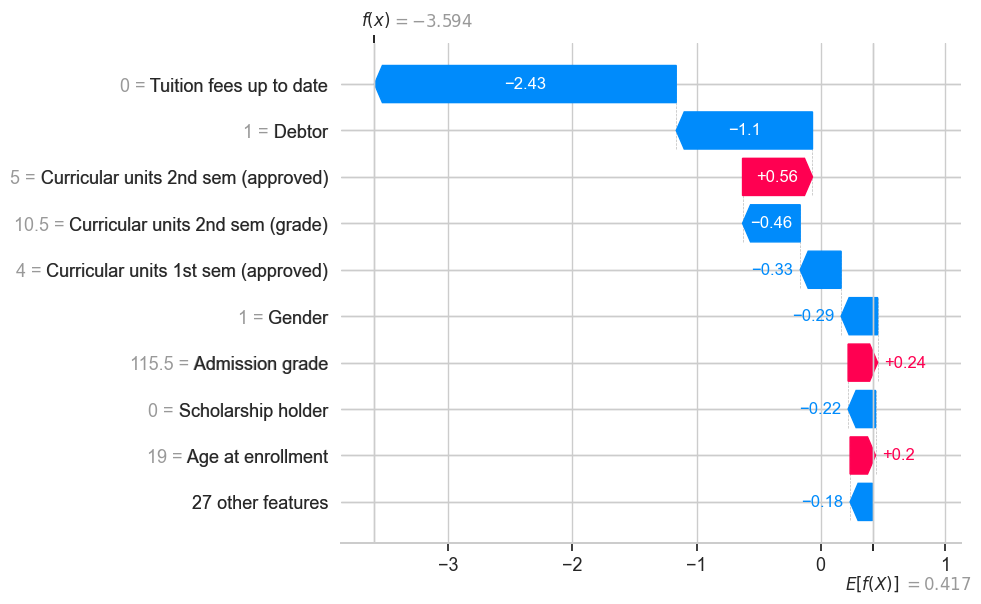


### 2. Intervention Simulation


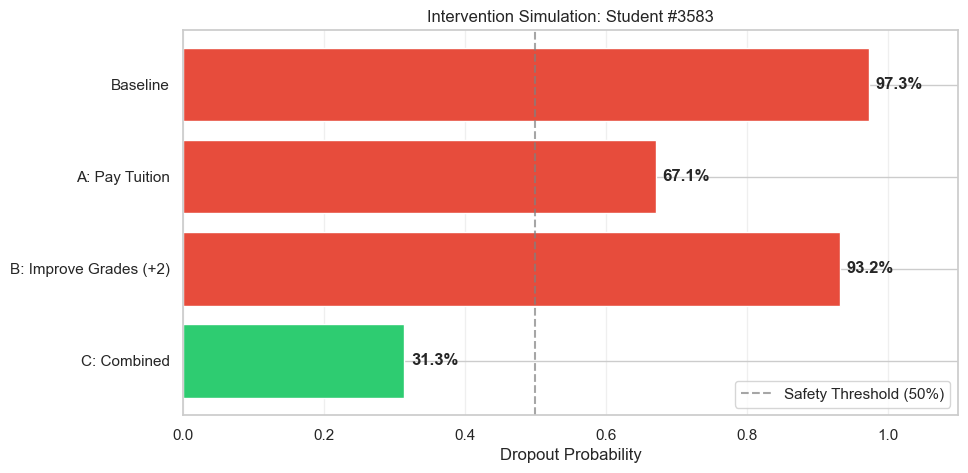

In [66]:
# --- STEP 1: Load Candidates ---
# Get the top 100 highest risk students
candidates = get_high_risk_students(xgb_model, 'data.csv', risk_threshold=0.85).head(100)

# --- STEP 2: Show the "Success Story" ---
# This proves the system is useful
print("Analyzing Case A: The Savable Student")
find_and_explain_savable_student(xgb_model, candidates)



#### XAI Intervention "Hard Case"

This student represents the classic "Academic Slide" profile identified in our EDA:

- Demographics: They entered via the "Over 23" Application Mode (which we flagged as high-risk in Section 2B).

- Performance: They have passed 0 exams in the 1st semester. As noted in our Univariate Analysis, the "point of no return" is often established in the first year.






Analyzing Case B: The Non-Savable Student

SEARCHING FOR A 'HARD CASE' (UNSAVABLE STUDENT)...
FOUND: Student #3077 is a Hard Case.
Baseline Risk: 99.9%
Risk after ALL interventions: 99.7%

### 1. Root Cause Analysis (SHAP)


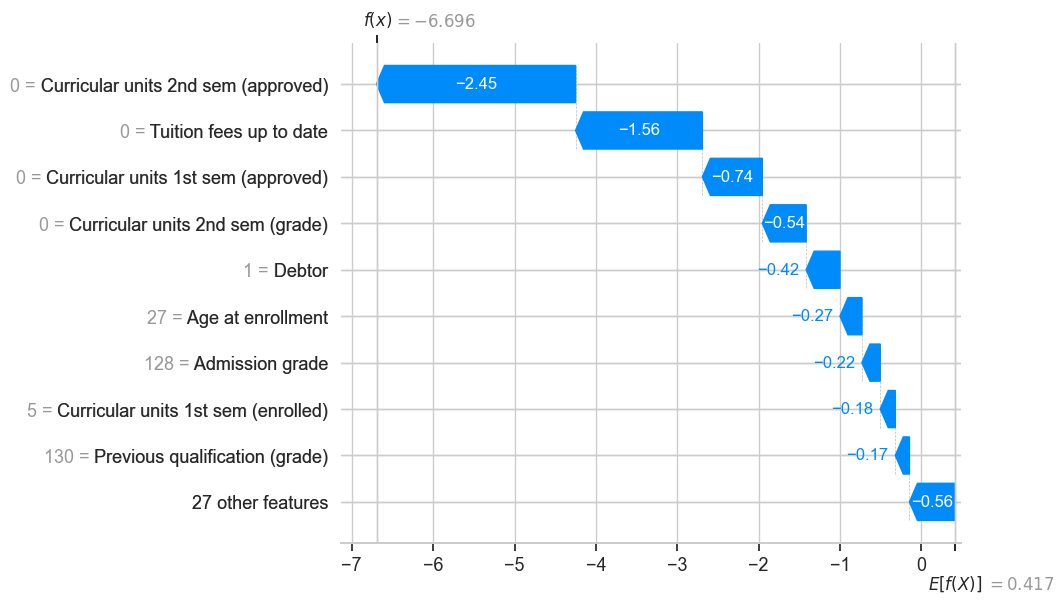


### 2. Intervention Simulation


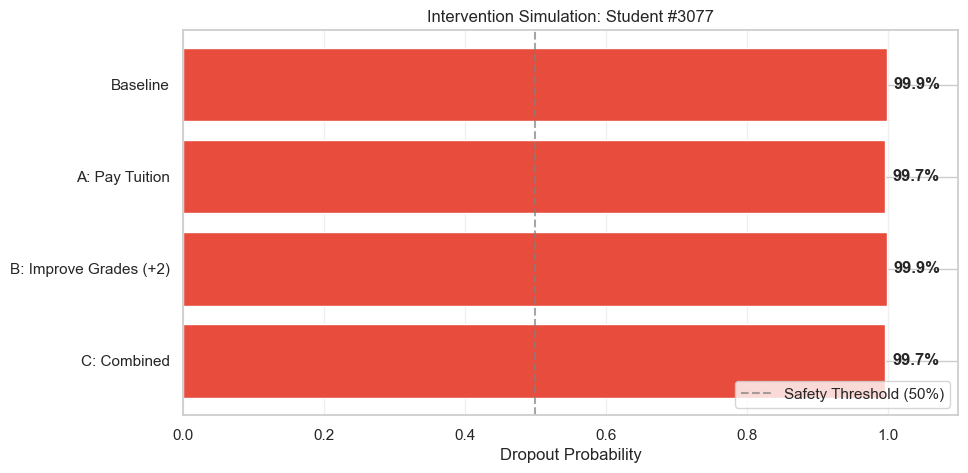


 CONCLUSION: Interventions failed. Risk remains 99.7%.
Recommendation: Standard automated interventions are insufficient.


In [67]:
# --- STEP 3: Show the "Hard Case" ---
# This shows the system's limits and need for human intervention
print("\n\n") 
print("Analyzing Case B: The Non-Savable Student")
find_and_explain_unsavable_student(xgb_model, candidates)

<a id="policy-implications-and-operationalization"></a>

## **Policy Implications and Operationalization**

The comprehensive application of these XAI techniques yields a nuanced narrative of student dropout that challenges the purely academic focus of traditional pedagogy and informs the design of intervention systems.

#### The Primacy of Socio-Economic Factors

Glass-box models  and feature importance analysis (SHAP) consistently rank Tuition fees up to date and Scholarship holder status alongside or above Curricular units approved.

- **Insight**: Dropout in this dataset is often a financial decision, not just an academic failure. A student with passing grades but unpaid fees is at higher risk than a student with failing grades but secure finances.

- **Policy Ripple Effect**: Predictive models that ignore financial data will have high error rates on "capable but poor" students. Interventions must prioritize financial counseling and emergency bursaries over academic tutoring for this subgroup.

#### The "Point of No Return" and Temporal Criticality

The EBM shape functions and DiCE counterfactuals suggest a temporal criticality. The interaction between 1st sem and 2nd sem grades indicates that recovery is possible after a poor 1st semester, but a poor 2nd semester is a nearly irreversible signal for dropout.

- **Intervention Window:** Interventions must occur between semesters. Waiting for 2nd-semester results is too late. Early warning systems must trigger at the mid-semester assessment points.


##### Actionability vs. Predictability

While Admission Grade is a strong predictor, it offers no recourse (it is historical). Counterfactual analysis highlights that Curricular units enrolled is a mutable lever.

- **Recommendation**: Advising at-risk students to reduce their course load (enroll in fewer units) might paradoxically increase their survival probability by allowing them to focus and pass the few courses they attempt, maintaining "Enrolled" status rather than "Dropout."

<a id="references"></a>
## **References**


[1] Alameri, F. (2025). *Predicting Student Dropout Risk Using Machine Learning*.

[2] Martins, M. et al. (2021). *Predicting student dropout and academic success*.

[3] Polytechnic Institute of Portalegre (2021). *Piaes dataset: Feature information and statistics*.

[4] Ponce-Bobadilla et al. (2024). *Practical guide to SHAP analysis*.

[5] Ridwan & Priyanto (2024). *Predict students’ dropout and academic success with XGBoost*.

[6] Towards Data Science. *A Data Scientist’s Essential Guide to Exploratory Data Analysis*.
https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6

[7] Towards Data Science. *The How of Explainable AI: Pre-Modelling Explainability*.
https://medium.com/data-science/the-how-of-explainable-ai-pre-modelling-explainability-699150495fe4

[8] Khan Academy. *Identifying Outliers Using the IQR Rule*.
https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

[9] GraphPad Software. *Principal Component Analysis (PCA): Statistical Checklist*.
https://www.graphpad.com/guides/prism/latest/statistics/stat_checklist_pca.htm


